<a href="https://colab.research.google.com/github/chetnaarora93/Data-Analysis-Project/blob/main/Delhivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Delhivery:
**Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities. The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.**

**Problem Statement:** The company wants to understand and process the data coming out of data engineering pipelines

• Clean, sanitize and manipulate data to get useful features out of raw fields.

• Make sense out of the raw data and help the data science team to build forecasting models on it.

### Column Profiling:

1. data - tells whether the data is testing or training data
2. trip_creation_time – Timestamp of trip creation
3. route_schedule_uuid – Unique Id for a particular route schedule
4. route_type – Transportation type.

    FTL (Full Truck Load): FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way.

    Carting: Handling system consisting of small vehicles (carts).
    
5. trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
6. source_center - Source ID of trip origin
7. source_name - Source Name of trip origin
8. destination_cente – Destination ID
9. destination_name – Destination Name
10. od_start_time – Trip start time
11. od_end_time – Trip end time
12. start_scan_to_end_scan – Time taken to deliver from source to destination
13. is_cutoff – Unknown field
14. cutoff_factor – Unknown field
15. cutoff_timestamp – Unknown field
16. actual_distance_to_destination – Distance in Kms between source and destination warehouse
17. actual_time – Actual time taken to complete the delivery (Cumulative)
18. osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
19. osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
20. factor – Unknown field
21. segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
22. segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
23. segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
24. segment_factor – Unknown field

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181')

# Set display options to show all columns
pd.set_option('display.max_columns', None)

df.head(15)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,27,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,36,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,False,43,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


## EDA

- Exploring dataset structure, characteristics of features & statistical summary

In [ ]:
df.shape

(144867, 24)

Datset consist of `144867 rows` & `24 features`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

- Most of the features are of float & object datatype.
- Some of the columns consisitng of time info need to be converted into timeframe datatype to evaluate the data.

In [ ]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


**Brief summary:**

1. The longest time taken for a delivery is `7898` while the shortest is `20`.
> 75% of the data shows time taken for whole delivery is less than `1634`.
2. The longest distance to destination is `1927.44` while shortest is `9`.
> 75% of the data shows that the actual distance to destination is less than `286.70`.
3. The max actual time taken for delivery is `4532` and shortest actual time taken is `9`.
> 75% of the data indicates the actual time to be less than `513`.

- Source_name & destination_name have null records
- No duplicate records found

#### Converting datatype of features consisiting information on time

In [ ]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [ ]:
#verifying datatype of changed features
print(df['trip_creation_time'].dtype, df['od_start_time'].dtype, df['od_end_time'].dtype)

datetime64[ns] datetime64[ns] datetime64[ns]


In [ ]:
#Exploring unique values of features
df.nunique()

,0
data,2
trip_creation_time,14817
route_schedule_uuid,1504
route_type,2
trip_uuid,14817
source_center,1508
source_name,1498
destination_center,1481
destination_name,1468
od_start_time,26369


### Insights:

- Dataset consist of 14817 different trips. On an average each trip has ~10 records of data.
- Dataset has 1504 unique route schedules
- Dataset has 1508 unique source centers & 1481 unique destination centers

### Handling Missing Values

In [ ]:
#Null values and duplicate records detection
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [ ]:
#Identifying the source_center of missing source_name
missing_source = df.loc[df['source_name'].isnull(), 'source_center'].unique()

for i in missing_source:
    unique_source_name = df.loc[df['source_center']== i, 'source_name'].unique()
    if pd.isna(unique_source_name):
        print('For Source Center: ', i, '------> Source Name: N/A')
    else:
        print('For Source Center: ', i, '------> Source Name: ', unique_source_name)

For Source Center:  IND342902A1B ------> Source Name: N/A
For Source Center:  IND577116AAA ------> Source Name: N/A
For Source Center:  IND282002AAD ------> Source Name: N/A
For Source Center:  IND465333A1B ------> Source Name: N/A
For Source Center:  IND841301AAC ------> Source Name: N/A
For Source Center:  IND509103AAC ------> Source Name: N/A
For Source Center:  IND126116AAA ------> Source Name: N/A
For Source Center:  IND331022A1B ------> Source Name: N/A
For Source Center:  IND505326AAB ------> Source Name: N/A
For Source Center:  IND852118A1B ------> Source Name: N/A


In [ ]:
#Identifying the destination_center of missing destination_name
missing_destination = df.loc[df['destination_name'].isnull(), 'destination_center'].unique()

for i in missing_destination:
    unique_destination_name = df.loc[df['destination_center']== i, 'destination_name'].unique()
    if pd.isna(unique_destination_name):
        print('For Destination Center:', i, '------> Destination Name: N/A')
    else:
        print('For Destination Center:', i, '------> Destination Name: ', unique_destination_name)

For Destination Center: IND342902A1B ------> Destination Name: N/A
For Destination Center: IND577116AAA ------> Destination Name: N/A
For Destination Center: IND282002AAD ------> Destination Name: N/A
For Destination Center: IND465333A1B ------> Destination Name: N/A
For Destination Center: IND841301AAC ------> Destination Name: N/A
For Destination Center: IND505326AAB ------> Destination Name: N/A
For Destination Center: IND852118A1B ------> Destination Name: N/A
For Destination Center: IND126116AAA ------> Destination Name: N/A
For Destination Center: IND509103AAC ------> Destination Name: N/A
For Destination Center: IND221005A1A ------> Destination Name: N/A
For Destination Center: IND250002AAC ------> Destination Name: N/A
For Destination Center: IND331001A1C ------> Destination Name: N/A
For Destination Center: IND122015AAC ------> Destination Name: N/A


In [ ]:
#Checking IDs for where source_name is missing, is destination_name missing?
np.all(df.loc[df['source_name'].isnull(), 'source_center'].isin(missing_destination))

False

#### Treating Missing source & destination name

In [ ]:
# Fill missing values with a constant value
constant_value = 'N/A'
df['source_name'].fillna(constant_value, inplace=True)
df['destination_name'].fillna(constant_value, inplace=True)


<ipython-input-57-49e98d4ed03e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['source_name'].fillna(constant_value, inplace=True)
<ipython-input-57-49e98d4ed03e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


## Visual Analysis

- Unvariate Analysis

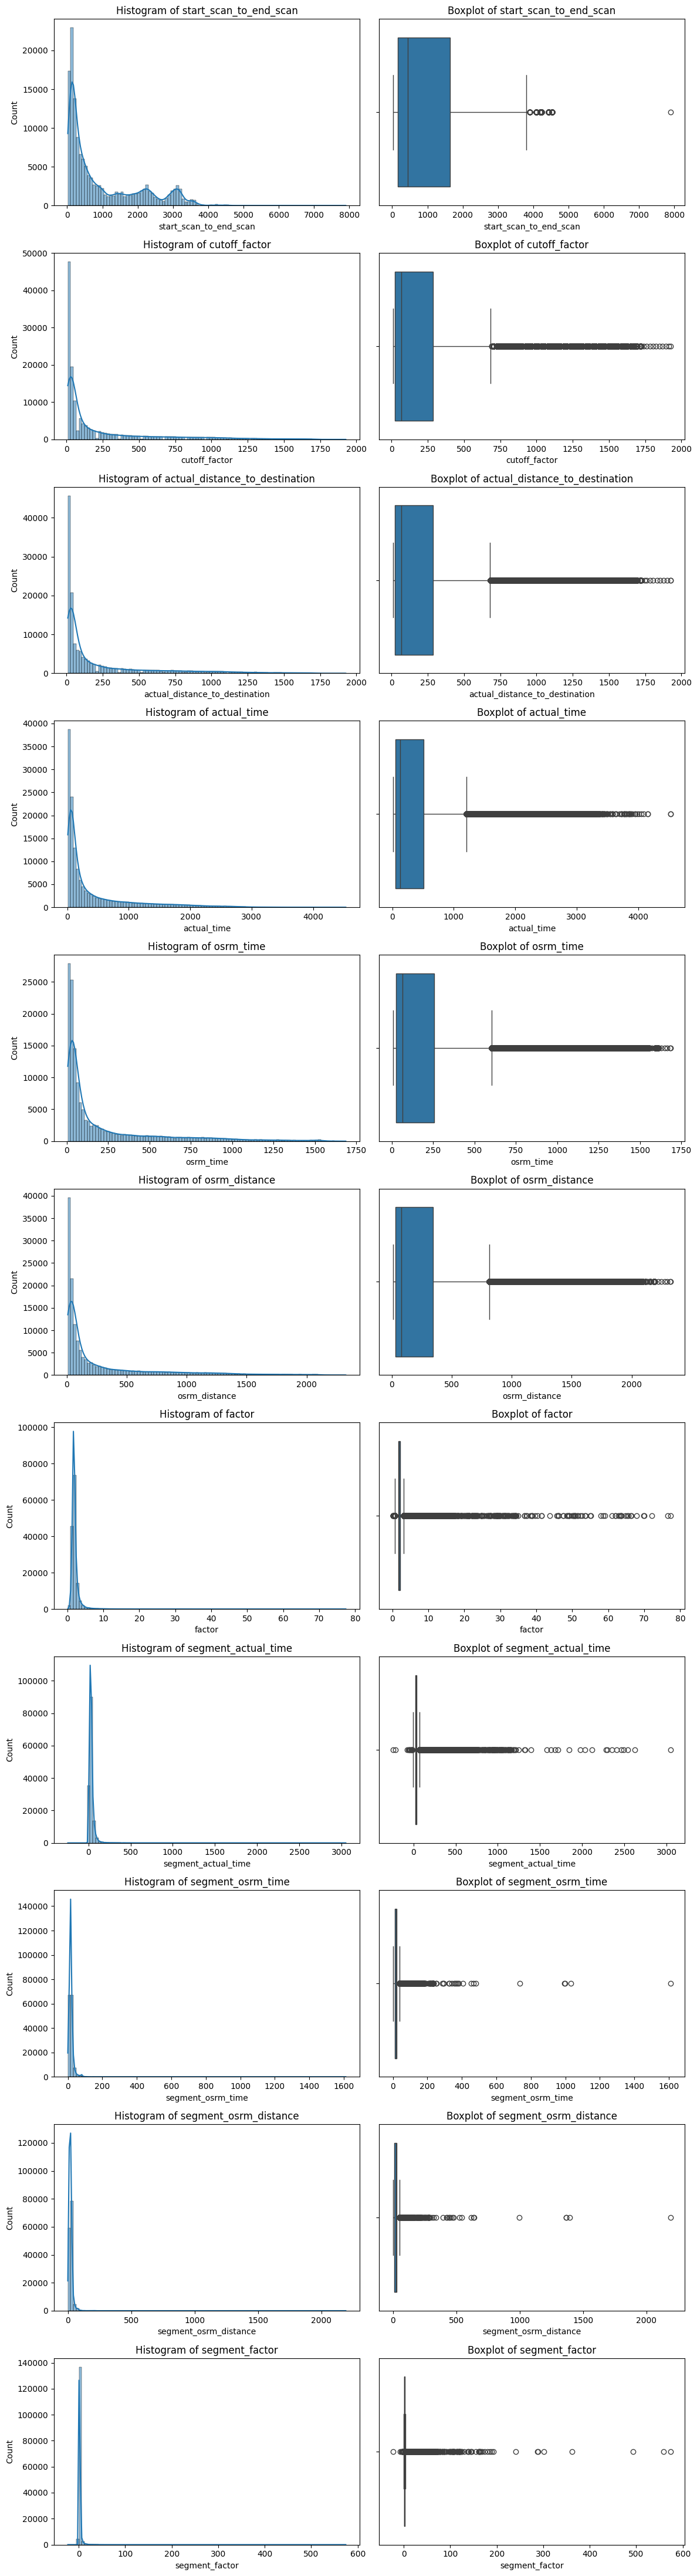

In [ ]:
#Creating visual plots for numeric columns
num_cols = df.select_dtypes(include=['int','float']).columns

# Set up the plot grid
fig, axes = plt.subplots(nrows=len(num_cols), ncols=2, figsize=(12, 4 * len(num_cols)))

# Iterate over each continuous column
for idx, col in enumerate(num_cols):
    # Plot histogram
    sns.histplot(data=df, x=col, kde = True, bins = 100,  ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Histogram of {col}')

    # Plot boxplot
    sns.boxplot(data=df, x=col, ax=axes[idx, 1])
    axes[idx, 1].set_title(f'Boxplot of {col}')

# Adjust spacing between plots
plt.tight_layout()
plt.show()

**Inference of univariate plots:**

- All the continous feature are `right tailed` which indicates the major portion of data lies in a particular range.
- All the continous feature consist of outliers which will be treated on as per know basis

In [ ]:
#Removing the features that has unknown information
df.drop(['is_cutoff','cutoff_factor', 'cutoff_timestamp', 'segment_factor'], axis = 1, inplace = True)
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'factor',
       'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

**Inference:**

- `actual time` is highly correlated with `actual distance to destination` at about 98%
- `osrm_time` & `osrm_distance` have a correlation of 98% with `actual_time`
- `segment_osrm_distance` have a correlation of 95% with `segment_osrm_time`

## Feature Creation

#### Extracting feature (year, month & day) to validate the range of trip data

In [ ]:
df['trip_creation_time'].sample(5)

,trip_creation_time
102783,2018-09-24 06:46:42.627615
58044,2018-10-02 22:45:01.857668
122154,2018-09-14 01:19:17.278175
37706,2018-09-25 02:10:25.965118
18910,2018-09-24 03:39:32.634806


In [ ]:
df['trip_creation_time'].dt.year.value_counts()

,count
trip_creation_time,
2018,144867


In [ ]:
df['trip_creation_time'].dt.month.value_counts()

,count
trip_creation_time,
9,127349
10,17518


In [ ]:
df['trip_creation_time'].dt.day.value_counts()

,count
trip_creation_time,
21,7639
15,7366
18,7354
20,7281
25,7168
13,7110
26,7059
17,7006
12,6995


In [ ]:
df['trip_creation_time'].dt.day_name().value_counts()

,count
trip_creation_time,
Wednesday,26732
Thursday,20481
Friday,20242
Tuesday,19961
Saturday,19936
Monday,19645
Sunday,17870


**Extracting Features (State, City, Pincode) from source & destination columns**

In [ ]:
df.sample(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance
55079,training,2018-09-25 22:36:07.052441,thanos::sroute:bcce7b68-e962-4a29-af24-167e3e9...,FTL,trip-153791496705218196,IND781018AAB,Guwahati_Hub (Assam),IND110037AAM,Delhi_Airport_H (Delhi),2018-09-25 22:36:07.052441,2018-09-28 18:37:07.622912,4081.0,22.344337,60.0,25.0,25.2973,2.400000,60.0,25.0,25.2973
48218,training,2018-09-21 22:01:58.843910,thanos::sroute:3b9d8baa-6a81-400e-ab72-5f9eded...,FTL,trip-153756731884367333,IND365560AAA,Amreli_MrktYrd_DC (Gujarat),IND365560AAB,Amreli_Rajula_DC (Gujarat),2018-09-22 02:53:04.992077,2018-09-22 04:54:35.371170,121.0,45.693676,72.0,42.0,49.3692,1.714286,35.0,17.0,23.6312
105106,training,2018-09-20 13:15:31.118938,thanos::sroute:bc7dbb1d-9379-4674-b8d3-f9c3b96...,FTL,trip-153744933111865413,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND712311AAA,Kolkata_Dankuni_HB (West Bengal),2018-09-20 13:15:31.118938,2018-09-22 17:47:25.279282,3151.0,484.611279,1236.0,363.0,514.4804,3.404959,26.0,17.0,24.6450
6635,test,2018-09-28 22:37:36.294770,thanos::sroute:fa83fd49-3327-4503-8e80-bf58ed6...,FTL,trip-153817425629451735,IND834002AAB,Ranchi_Hub (Jharkhand),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-29 12:07:44.347459,2018-09-30 18:32:32.490188,1824.0,264.568297,484.0,231.0,308.2515,2.095238,28.0,24.0,34.1575
86490,test,2018-09-27 02:31:31.313495,thanos::sroute:8a6d78dc-4752-4bc6-9dee-8394a3a...,FTL,trip-153801549131324526,IND344001AAA,Barmer_Nehru3PL_D (Rajasthan),IND345021AAA,Pokhran_SttinDPP_D (Rajasthan),2018-09-27 07:10:15.749948,2018-09-27 12:04:31.104098,294.0,66.100162,73.0,51.0,72.2480,1.431373,18.0,17.0,25.0555


In [ ]:
#Splitting City name from source_name feature
df['source_city'] = df['source_name'].str.split('_').str[0]

#Extracting State name from source_name
df['source_state'] = df['source_name'].str.split('(').str[-1].str.strip(')')

#Splitting destination city & state from destination_name
df['destination_city'] = df['destination_name'].str.split('_').str[0]
df['destination_state'] = df['destination_name'].str.split('(').str[-1].str.strip(')')

#Extracting pincode from source_center & destination_center
df['source_pincode'] = df['source_center'].apply(lambda x: x[3:9])
df['destination_pincode'] = df['destination_center'].apply(lambda x: x[3:9])

***

In [ ]:
#Correcting mispelled names of city & state
df['source_city'] = df['source_city'].replace({'Darbhanga (Bihar)': 'Darbhanga',
                                               'Del' : 'Delhi',
                                               'PNQ Vadgaon Sheri DOC (Maharashtra)': 'Vadgaon',
                                               'Ahmedabad': 'Ahemdabad',
                                               'AMD' : 'Ahemdabad',
                                               'Amdavad' : 'Ahemdabad',
                                               'Mumbai Hub (Maharashtra)': 'Mumbai',
                                               'Bengaluru': 'Bangalore',
                                               'BLR': 'Bangalore',
                                               'Bhopal MP Nagar (Madhya Pradesh)': 'Bhopal',
                                               'SrinagarUK': 'Srinagar',
                                               'CCU': 'Kolkata',
                                               'MAA' : 'Chennai',
                                               'GGN' : 'Gurgaon',
                                               'FBD' : 'Faridabad'})

df['destination_city'] = df['destination_city'].replace({'Palwal (Haryana)': 'Palwal',
                                                         'BLR' : 'Bangalore',
                                                         'Bengaluru' : 'Bangalore',
                                                         'HBR Layout PC (Karnataka)': 'Bangalore',
                                                         'Mumbai Hub (Maharashtra)': 'Mumbai',
                                                         'AMD': 'Ahemdabad',
                                                         'Ahmedabad': 'Ahemdabad',
                                                         'del' : 'Delhi',
                                                         'Bhopal MP Nagar (Madhya Pradesh)': 'Bhopal',
                                                         'SrinagarUK': 'Srinagar',
                                                         'PNQ Vadgaon Sheri DOC (Maharashtra)': 'Vadgaon'})

In [ ]:
df['destination_city'].nunique()

1253

In [ ]:
df['destination_state'].nunique()

33

In [ ]:
df['destination_pincode'].nunique()

1384

**The organization is operational across 1255 different cities serving 1384 different areas & 32 states country wide**

In [ ]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_city,source_state,destination_city,destination_state,source_pincode,destination_pincode
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,Anand,Gujarat,Khambhat,Gujarat,388121,388620
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,Anand,Gujarat,Khambhat,Gujarat,388121,388620
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,Anand,Gujarat,Khambhat,Gujarat,388121,388620
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,Anand,Gujarat,Khambhat,Gujarat,388121,388620
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,Anand,Gujarat,Khambhat,Gujarat,388121,388620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,Sonipat,Haryana,Gurgaon,Haryana,131028,000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,Sonipat,Haryana,Gurgaon,Haryana,131028,000000
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,Sonipat,Haryana,Gurgaon,Haryana,131028,000000
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,Sonipat,Haryana,Gurgaon,Haryana,131028,000000


## Merging of rows & aggregating fields

- The goal here is to merge the trip based on the unique trip_uuid, source_name & destination_name

In [ ]:
df1 = df.groupby(by = ['trip_uuid', 'source_center', 'destination_center']).agg({'data' : 'first',
                                        'route_type' : 'first',
                                        'trip_creation_time' : 'first',
                                        'source_name' : 'first',
                                        'destination_name' : 'last',
                                        'od_start_time' : 'first',
                                        'od_end_time' : 'first',
                                        'start_scan_to_end_scan' : 'first',
                                        'actual_distance_to_destination' : 'last',
                                        'actual_time' : 'last',
                                        'osrm_time' : 'last',
                                        'osrm_distance' : 'last',
                                        'segment_actual_time' : 'sum',
                                        'segment_osrm_time' : 'sum',
                                        'segment_osrm_distance' : 'sum'}).reset_index()
df1

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26366,trip-153861118270144424,IND583119AAA,IND583101AAA,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


#### Creating Feature 'od_total_time' by subtracting start_time from end_time

In [ ]:
df1['od_total_time'] = df1['od_end_time'] - df1['od_start_time']

#drop the original column
#df1.drop(columns = ['od_end_time', 'od_start_time'], inplace = True)

#converting time into hours
df1['od_total_time'] = df1['od_total_time'].apply(lambda x : round(x.total_seconds() / 60.0, 1))

In [ ]:
df1

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_total_time
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,1260.6
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,999.5
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,58.8
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,122.8
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,834.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431,62.1
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869,91.1
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184,44.2
26366,trip-153861118270144424,IND583119AAA,IND583101AAA,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303,287.5


In [ ]:
df1 = df1.groupby(by = 'trip_uuid', as_index = False).agg({'source_center' : 'first',
                                                           'destination_center' : 'last',
                                                           'data' : 'first',
                                                           'route_type' : 'first',
                                                           'trip_creation_time' : 'first',
                                                           'source_name' : 'first',
                                                           'destination_name' : 'last',
                                                           'od_total_time' : 'sum',
                                                           'start_scan_to_end_scan' : 'sum',
                                                           'actual_distance_to_destination' : 'sum',
                                                           'actual_time' : 'sum',
                                                           'osrm_time' : 'sum',
                                                           'osrm_distance' : 'sum',
                                                           'segment_actual_time' : 'sum',
                                                           'segment_osrm_time' : 'sum',
                                                           'segment_osrm_distance' : 'sum'}).reset_index()
df1

,index,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.1,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.6,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.3,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.5,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.3,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,14812,trip-153861095625827784,IND160002AAC,IND160002AAC,test,Carting,2018-10-03 23:55:56.258533,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),258.0,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
14813,14813,trip-153861104386292051,IND121004AAB,IND121004AAA,test,Carting,2018-10-03 23:57:23.863155,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),60.6,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14814,14814,trip-153861106442901555,IND208006AAA,IND208006AAA,test,Carting,2018-10-03 23:57:44.429324,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),422.1,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866
14815,14815,trip-153861115439069069,IND627005AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),348.6,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324


In [ ]:
df1['trip_creation_day'] = df1['trip_creation_time'].dt.day.astype('int8')
df1['trip_creation_month'] = df1['trip_creation_time'].dt.month.astype('int8')
df1['trip_creation_year'] = df1['trip_creation_time'].dt.year.astype('int16')
df1['trip_creation_week'] = df1['trip_creation_time'].dt.isocalendar().week.astype('int16')
df1['trip_creation_hour'] = df1['trip_creation_time'].dt.hour.astype('int8')

df1

,index,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_week,trip_creation_hour
0,0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.1,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,12,9,2018,37,0
1,1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.6,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,12,9,2018,37,0
2,2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.3,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,12,9,2018,37,0
3,3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.5,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,12,9,2018,37,0
4,4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.3,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,12,9,2018,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,14812,trip-153861095625827784,IND160002AAC,IND160002AAC,test,Carting,2018-10-03 23:55:56.258533,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),258.0,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,3,10,2018,40,23
14813,14813,trip-153861104386292051,IND121004AAB,IND121004AAA,test,Carting,2018-10-03 23:57:23.863155,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),60.6,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,3,10,2018,40,23
14814,14814,trip-153861106442901555,IND208006AAA,IND208006AAA,test,Carting,2018-10-03 23:57:44.429324,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),422.1,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866,3,10,2018,40,23
14815,14815,trip-153861115439069069,IND627005AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),348.6,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324,3,10,2018,40,23


In [ ]:
#Splitting City name from source_name feature
df1['source_city'] = df1['source_name'].str.split('_').str[0]

#Extracting State name from source_name
df1['source_state'] = df1['source_name'].str.split('(').str[-1].str.strip(')')

#Splitting destination city & state from destination_name
df1['destination_city'] = df1['destination_name'].str.split('_').str[0]
df1['destination_state'] = df1['destination_name'].str.split('(').str[-1].str.strip(')')

#Extracting pincode from source_center & destination_center
df1['source_pincode'] = df1['source_center'].apply(lambda x: x[3:9])
df1['destination_pincode'] = df1['destination_center'].apply(lambda x: x[3:9])

In [ ]:
#Correcting mispelled names of city & state
df1['source_city'] = df1['source_city'].replace({'Darbhanga (Bihar)': 'Darbhanga',
                                               'Del' : 'Delhi',
                                               'PNQ Vadgaon Sheri DOC (Maharashtra)': 'Vadgaon',
                                               'Ahmedabad': 'Ahemdabad',
                                               'AMD' : 'Ahemdabad',
                                               'Amdavad' : 'Ahemdabad',
                                               'Mumbai Hub (Maharashtra)': 'Mumbai',
                                               'HBR Layout PC (Karnataka)': 'Bangalore',
                                               'Bengaluru': 'Bangalore',
                                               'BLR': 'Bangalore',
                                               'Bhopal MP Nagar (Madhya Pradesh)': 'Bhopal',
                                               'SrinagarUK': 'Srinagar',
                                               'CCU': 'Kolkata',
                                               'MAA' : 'Chennai',
                                               'GGN' : 'Gurgaon',
                                               'FBD' : 'Faridabad'})

df1['destination_city'] = df1['destination_city'].replace({'Palwal (Haryana)': 'Palwal',
                                                         'BLR' : 'Bangalore',
                                                         'HBR Layout PC (Karnataka)': 'Bangalore',
                                                         'Bengaluru' : 'Bangalore',
                                                         'Mumbai Hub (Maharashtra)': 'Mumbai',
                                                         'AMD': 'Ahemdabad',
                                                         'Ahmedabad': 'Ahemdabad',
                                                         'del' : 'Delhi',
                                                         'Bhopal MP Nagar (Madhya Pradesh)': 'Bhopal',
                                                         'SrinagarUK': 'Srinagar',
                                                         'PNQ Vadgaon Sheri DOC (Maharashtra)': 'Vadgaon',
                                                         'MAA' : 'Chennai', 'CCU' : 'Kolkata', 'GGN' : 'Gurgaon',
                                                         'FBD' : 'Faridabad'})

df1

,index,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_week,trip_creation_hour,source_city,source_state,destination_city,destination_state,source_pincode,destination_pincode
0,0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.1,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,12,9,2018,37,0,Kanpur,Uttar Pradesh,Kanpur,Uttar Pradesh,209304,209304
1,1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.6,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,12,9,2018,37,0,Doddablpur,Karnataka,Doddablpur,Karnataka,561203,561203
2,2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.3,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,12,9,2018,37,0,Gurgaon,Haryana,Gurgaon,Haryana,000000,000000
3,3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.5,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,12,9,2018,37,0,Mumbai,Maharashtra,Mumbai,Maharashtra,400072,401104
4,4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.3,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,12,9,2018,37,0,Bellary,Karnataka,Sandur,Karnataka,583101,583119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,14812,trip-153861095625827784,IND160002AAC,IND160002AAC,test,Carting,2018-10-03 23:55:56.258533,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),258.0,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,3,10,2018,40,23,Chandigarh,Punjab,Chandigarh,Punjab,160002,160002
14813,14813,trip-153861104386292051,IND121004AAB,IND121004AAA,test,Carting,2018-10-03 23:57:23.863155,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),60.6,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,3,10,2018,40,23,Faridabad,Haryana,Faridabad,Haryana,121004,121004
14814,14814,trip-153861106442901555,IND208006AAA,IND208006AAA,test,Carting,2018-10-03 23:57:44.429324,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),422.1,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866,3,10,2018,40,23,Kanpur,Uttar Pradesh,Kanpur,Uttar Pradesh,208006,208006
14815,14815,trip-153861115439069069,IND627005AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),348.6,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324,3,10,2018,40,23,Tirunelveli,Tamil Nadu,Tirchchndr,Tamil Nadu,627005,628204


In [ ]:
df1.shape

(14817, 29)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           14817 non-null  int64         
 1   trip_uuid                       14817 non-null  object        
 2   source_center                   14817 non-null  object        
 3   destination_center              14817 non-null  object        
 4   data                            14817 non-null  object        
 5   route_type                      14817 non-null  object        
 6   trip_creation_time              14817 non-null  datetime64[ns]
 7   source_name                     14817 non-null  object        
 8   destination_name                14817 non-null  object        
 9   od_total_time                   14817 non-null  float64       
 10  start_scan_to_end_scan          14817 non-null  float64       
 11  ac

## In-depth analysis & Feature Engineering

1. **Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.**

**Establish Null Hypothesis (Ho) & Alternate Hypothesis (Ha)**

- Ho: Mean of od_total_time & start_scan_to_end_scan are same

- Ha: Mean of od_total_time & start_scan_to_end_scan are different

In [ ]:
df1[['od_total_time', 'start_scan_to_end_scan']].describe()

,od_total_time,start_scan_to_end_scan
count,14817.000000,14817.000000
mean,531.697793,530.810016
std,658.868351,658.705957
min,23.500000,23.000000
25%,149.900000,149.000000
50%,280.800000,280.000000
75%,638.200000,637.000000
max,7898.600000,7898.000000


[]

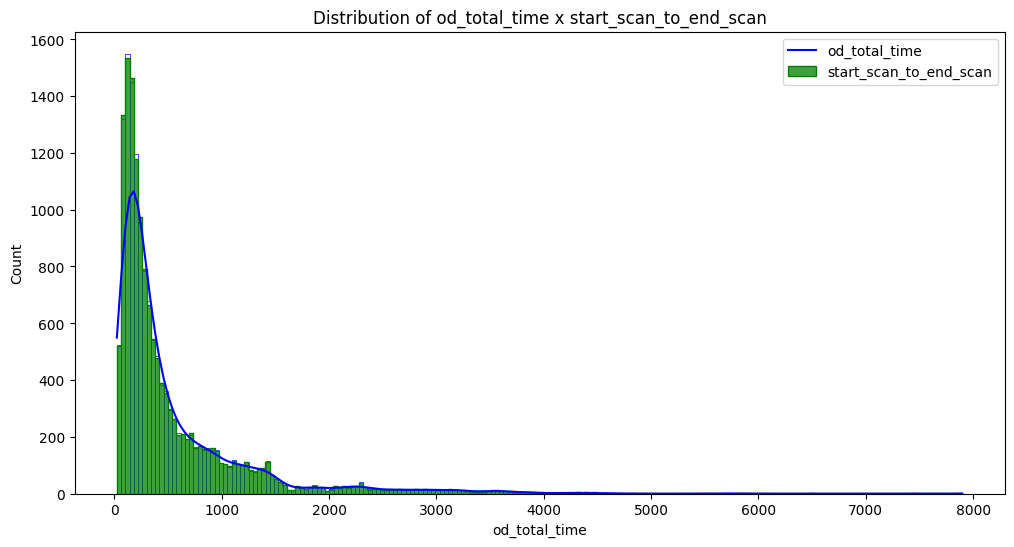

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df1['od_total_time'], fill = False, kde = True, color = 'blue',)
sns.histplot(df1['start_scan_to_end_scan'], kde = False, color = 'green', element = 'step')
plt.legend(['od_total_time', 'start_scan_to_end_scan'])
plt.title('Distribution of od_total_time x start_scan_to_end_scan')
plt.plot()

In [ ]:
print('mean of time total trip:',df1['od_total_time'].mean(),
      '\nmean time of start_scan_to_end_scan:',df1['start_scan_to_end_scan'].mean())

mean of time total trip: 531.6977930755214 
mean time of start_scan_to_end_scan: 530.8100155227104


**Performing ttest_ind to check the mean similarity between given two variable**

In [ ]:
test_stat, p_value = stats.ttest_ind(df1['od_total_time'], df1['start_scan_to_end_scan'], alternative = 'two-sided', equal_var = False)
print('P-value:', p_value)

## Set significance level
alpha = 0.05

# Compare p-value with significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is significant difference in mean time of both variable.")
else:
    print("Failed to reject the null hypothesis. There is no significant difference between mean time of both variable.")

P-value: 0.9076604850589675
Failed to reject the null hypothesis. There is no significant difference between mean time of both variable.


2. **Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [ ]:
df1[['actual_time', 'osrm_time']].describe()

,actual_time,osrm_time
count,14817.000000,14817.000000
mean,357.143754,161.384018
std,561.396157,271.360995
min,9.000000,6.000000
25%,67.000000,29.000000
50%,149.000000,60.000000
75%,370.000000,168.000000
max,6265.000000,2032.000000


**Mean of actual time seems to be significantly different from osrm time**

[]

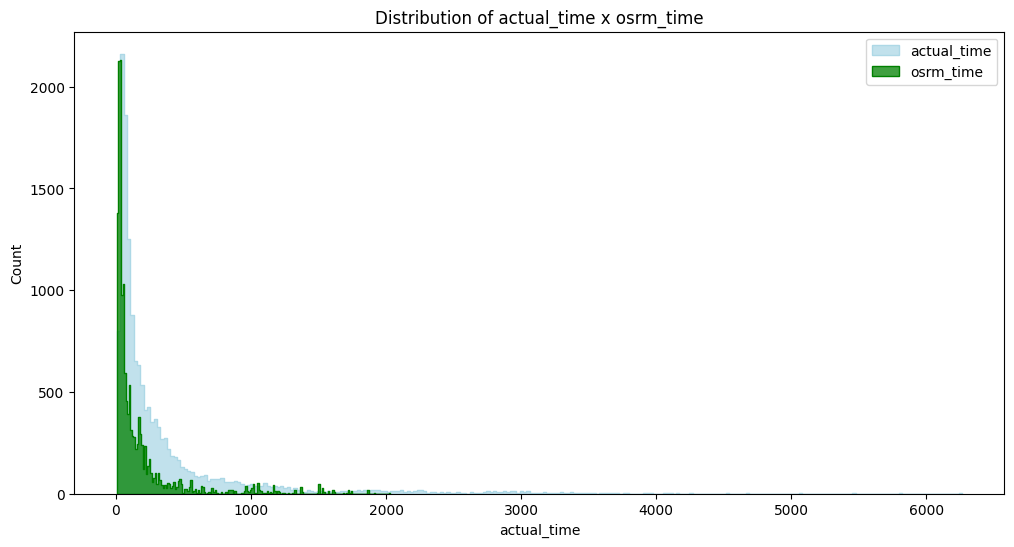

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df1['actual_time'], fill = True, color = 'lightblue', element = 'step')
sns.histplot(df1['osrm_time'], kde = False, color = 'green', element = 'step')
plt.legend(['actual_time', 'osrm_time'])
plt.title('Distribution of actual_time x osrm_time')
plt.plot()

**Nomrality check through QQ-plot**

[]

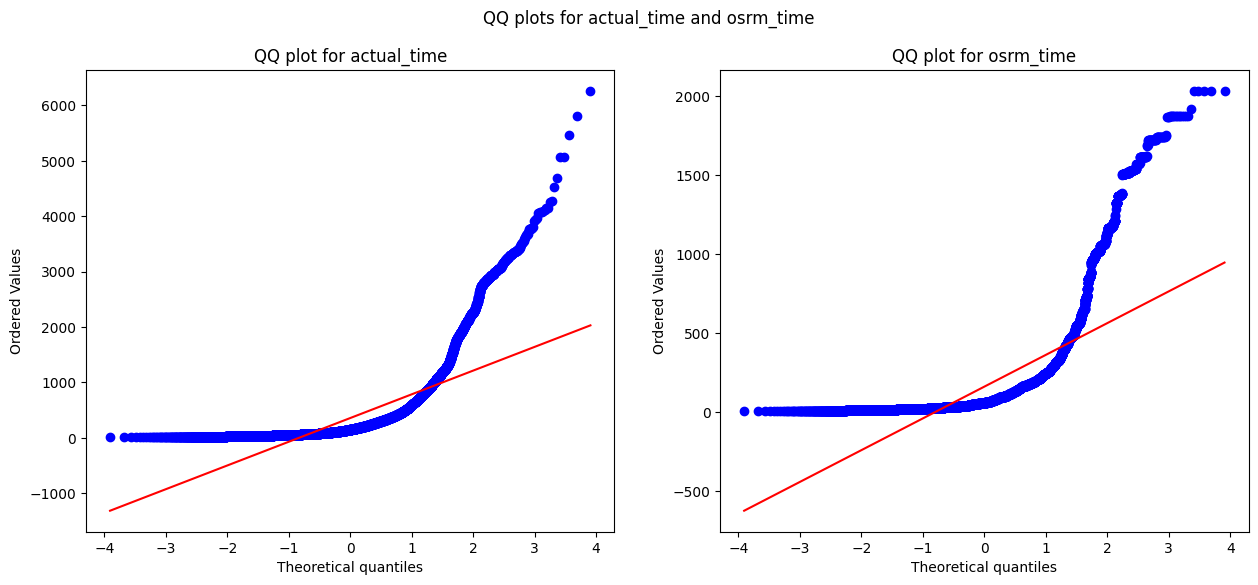

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and osrm_time')
stats.probplot(df1['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
stats.probplot(df1['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.plot()

***The distribution does not seem to follow normal***

**Performing Shapiro-Wilk test for normality**

- Ho : The sample follows normal distribution
- Ha : The sample does not follow normal distribution

Test Statistics : Shapiro-Wilk test for normality

In [ ]:
test_stat, p_val = stats.shapiro(df1['actual_time'].sample(3000))
print('p-value of actual_time samples', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

test_stat, p_value = stats.shapiro(df1['osrm_time'].sample(3000))
print('p-value of osrm_time sample', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value of actual_time samples 0.9076604850589675
The sample follows normal distribution
p-value of osrm_time sample 7.715089482337521e-67
The sample does not follow normal distribution


**Homogenity of variance using Levene's test**

In [ ]:
'''
Ho: Both features have same variance
Ha: Bothe feature have non-homogenous variance
'''

test_stat, p_value = stats.levene(df1['actual_time'], df1['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have homogenous Variance')
else:
    print('The samples have homogenous Variance ')

p-value 1.871297993683208e-220
The samples do not have homogenous Variance


**From above assumption test, since its violating the test, t-test cannot be executed. Performing it's equivalent non-paramteric test 'Mann-Whitney U rank' test for two independent sample test.**

In [ ]:
'''
Ho: Mean time of actual_time & osrm_time are similar.
Ha: Mean time of actual_time & osrm_time are different.
'''

test_stat, p_value = stats.mannwhitneyu(df1['actual_time'], df1['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Ho. Mean of two independent variable are different')
else:
    print('Failed to Reject Ho. Mean of two independent variables are same')

p-value 0.4164235159622476
Failed to Reject Ho. Mean of two independent variables are same


***Conclusion:***
Since p-value > 0.05, it can be said that, mean of two independent variables are similar

3. **Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [ ]:
df1[['actual_time', 'segment_actual_time']].describe()

,actual_time,segment_actual_time
count,14817.000000,14817.000000
mean,357.143754,353.892286
std,561.396157,556.247965
min,9.000000,9.000000
25%,67.000000,66.000000
50%,149.000000,147.000000
75%,370.000000,367.000000
max,6265.000000,6230.000000


**The mean time of two comparing feature seem to significantly different**

**Performing Visual Analysis to validate the normal distribution**

[]

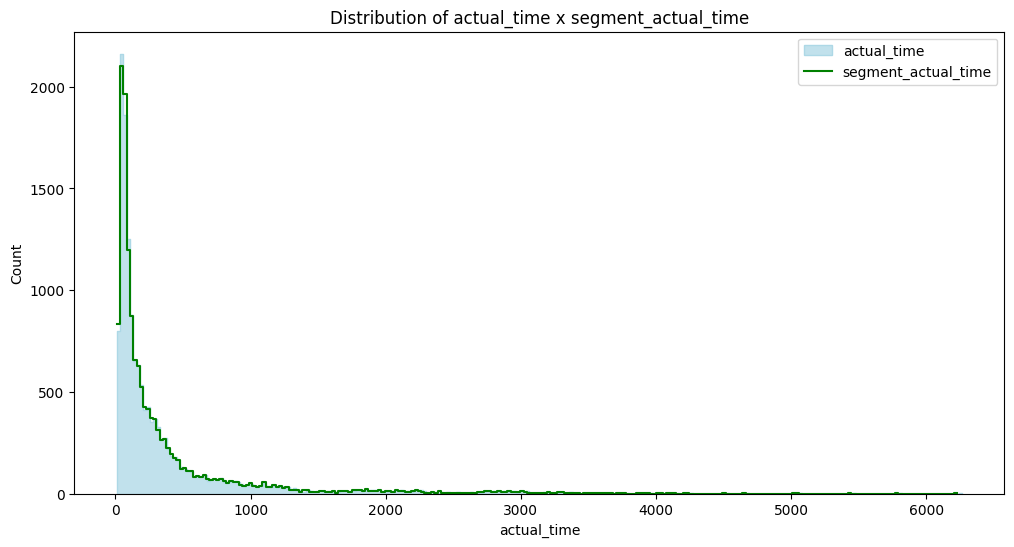

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df1['actual_time'], color = 'lightblue', element = 'step')
sns.histplot(df1['segment_actual_time'],  fill = False, color = 'green', element = 'step')
plt.legend(['actual_time', 'segment_actual_time'])
plt.title('Distribution of actual_time x segment_actual_time')
plt.plot()

***Normality check using QQ plot***

[]

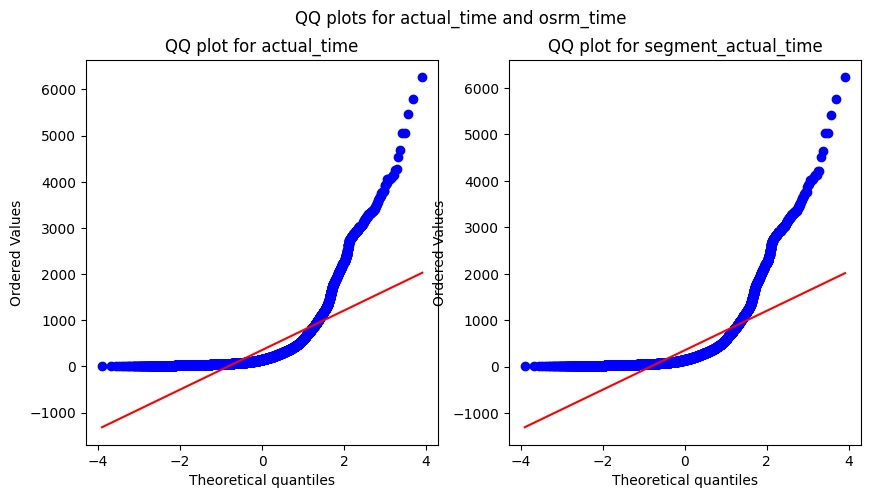

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and osrm_time')
stats.probplot(df1['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
stats.probplot(df1['segment_actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_actual_time')
plt.plot()

**The graph doesn't seem to follow the normal distribution which can also be validated through histogram plot**

**Performing Shapiro-Wilk test for normality**

- Ho : The sample follows normal distribution
- Ha : The sample does not follow normal distribution

Test Statistics : Shapiro-Wilk test for normality

In [ ]:
test_stat, p_value = stats.shapiro(df1['actual_time'].sample(5000))
print('p-value of actual_time samples:', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

test_stat, p_value = stats.shapiro(df1['segment_actual_time'].sample(5000))
print('p-value of osrm_time samples:', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value of actual_time samples: 3.6814664594696765e-76
The sample does not follow normal distribution
p-value of osrm_time samples: 3.6857624340501976e-76
The sample does not follow normal distribution


**Performing Homogenity test using Levene's Test**

In [ ]:
'''
Ho: Both features have same variance
Ha: Bothe feature have non-homogenous variance
'''

test_stat, p_value = stats.levene(df1['actual_time'], df1['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance')

p-value 0.6955022668700895
The samples have Homogenous Variance


**Since the data is violating assumption test, performing ttest_ind is inappropriate to reach the conclusion & will perform non-parametric equivalent test known as 'Mann-Whitney U rank' test**

In [ ]:
test_stat, p_value = stats.mannwhitneyu(df1['actual_time'], df1['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Ho. The mean of the two independent samples are not similar')
else:
    print('Failed to reject Ho. The mean of two independent samples are similar ')

p-value 0.4164235159622476
Failed to reject Ho. The mean of two independent samples are similar 


**Conclusion:** Since p_value > 0.05, the mean of actual_time & segmented_actual_time are similar

4. **Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [ ]:
df1[['osrm_distance', 'segment_osrm_distance']].describe()

,osrm_distance,segment_osrm_distance
count,14817.000000,14817.000000
mean,204.344689,223.201161
std,370.395573,416.628374
min,9.072900,9.072900
25%,30.819200,32.654500
50%,65.618800,70.154400
75%,208.475000,218.802400
max,2840.081000,3523.632400


**The mean value of the two independent feature are different**

**Performing visual analysis to check normal distribution**/

[]

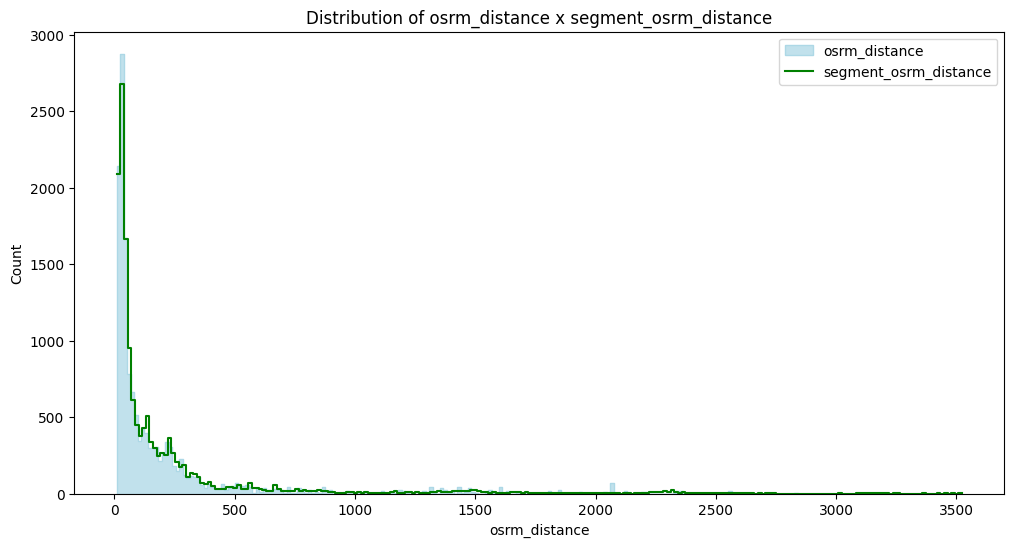

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df1['osrm_distance'], color = 'lightblue', element = 'step')
sns.histplot(df1['segment_osrm_distance'],  fill = False, color = 'green', element = 'step')
plt.legend(['osrm_distance', 'segment_osrm_distance'])
plt.title('Distribution of osrm_distance x segment_osrm_distance')
plt.plot()

**Normality check using QQ plot**

[]

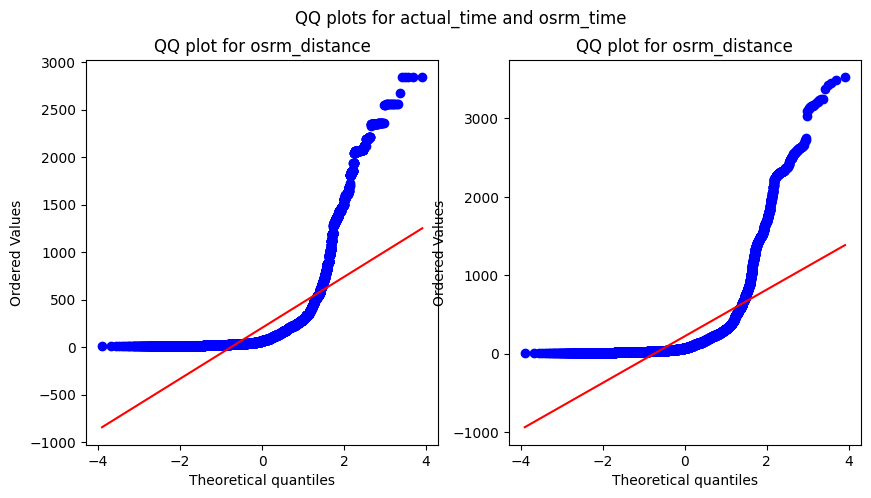

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and osrm_time')
stats.probplot(df1['osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_distance')
plt.subplot(1, 2, 2)
stats.probplot(df1['segment_osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_distance')
plt.plot()

**From the above two graph, we can assume that data of two independent features does not follow normal distribution.**

**Performing Shapiro-Wilk test for normality**

- Ho : The sample follows normal distribution
- Ha : The sample does not follow normal distribution

**Test Statistics : Shapiro-Wilk test for normality**

In [ ]:
test_stat, p_value = stats.shapiro(df1['osrm_distance'].sample(5000))
print('p-value of osrm_distance samples:', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

test_stat, p_value = stats.shapiro(df1['segment_osrm_distance'].sample(5000))
print('\np-value of segment_osrm_distance samples:', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value of osrm_distance samples: 2.345936340541238e-79
The sample does not follow normal distribution

p-value of segment_osrm_distance samples: 5.863900640692227e-80
The sample does not follow normal distribution


**Performinn Levene's Test to verify equal variances**

In [ ]:
#Building Null Hypothesis & Alternate Hypothesis
'''
Ho: Both features have same variance
Ha: Bothe feature have non-homogenous variance
'''

test_stat, p_value = stats.levene(df1['osrm_distance'], df1['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance')

p-value 0.00020976354422600578
The samples do not have Homogenous Variance


**Since the data is violating assumption test, performing ttest_ind is inappropriate to reach the conclusion & will perform non-parametric equivalent test known as 'Mann-Whitney U rank' test**

In [ ]:
test_stat, p_value = stats.mannwhitneyu(df1['osrm_distance'], df1['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Ho. The mean of the two independent samples are not similar')
else:
    print('Failed to reject Ho. The mean of two independent samples are similar ')

p-value 9.511383588276375e-07
Reject Ho. The mean of the two independent samples are not similar


**Conclusion:** It can be said after performing appropriate test, that mean of given two independent sample are different

5. **Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [ ]:
df1[['osrm_time', 'segment_osrm_time']].describe()

,osrm_time,segment_osrm_time
count,14817.000000,14817.000000
mean,161.384018,180.949787
std,271.360995,314.542047
min,6.000000,6.000000
25%,29.000000,31.000000
50%,60.000000,65.000000
75%,168.000000,185.000000
max,2032.000000,2564.000000


Mean of the population sample of are significantly different

**Plotting graph to check for normal distribution**

[]

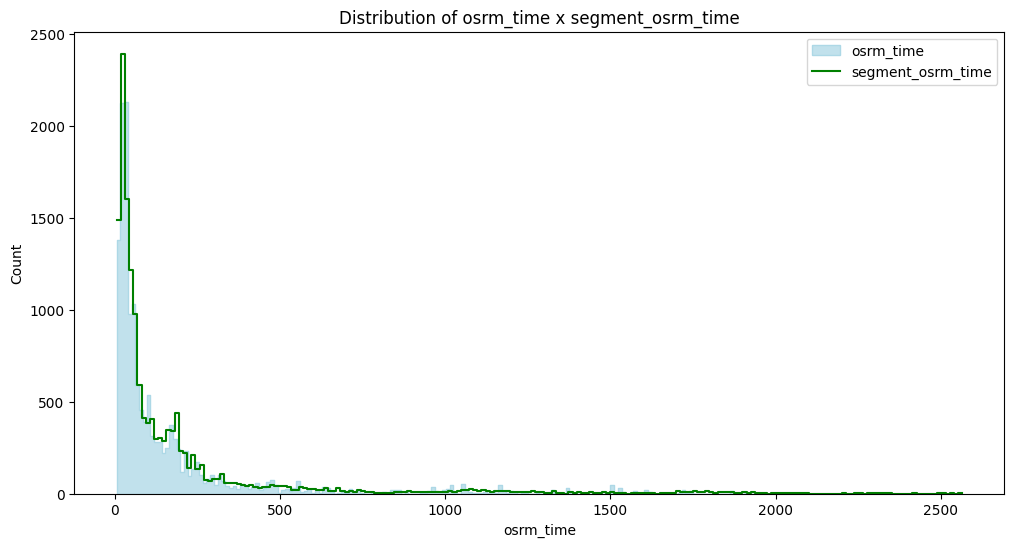

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df1['osrm_time'], color = 'lightblue', element = 'step')
sns.histplot(df1['segment_osrm_time'],  fill = False, color = 'green', element = 'step')
plt.legend(['osrm_time', 'segment_osrm_time'])
plt.title('Distribution of osrm_time x segment_osrm_time')
plt.plot()

**Normality check using QQ plot**

[]

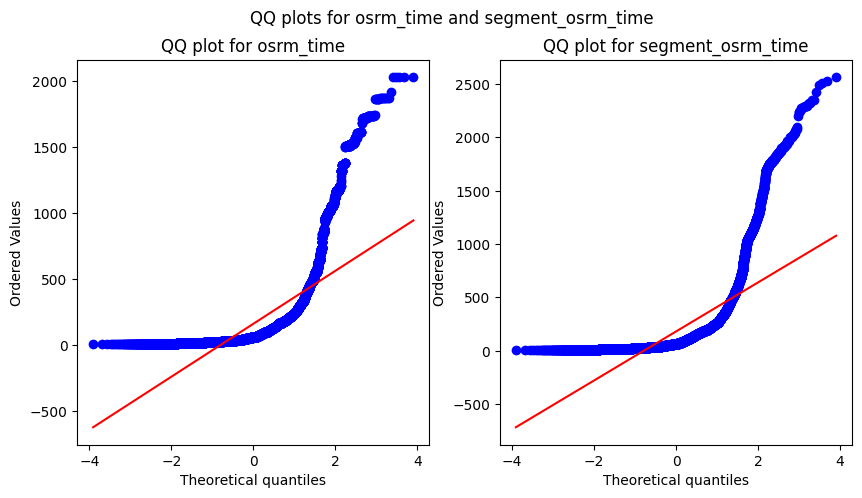

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_time and segment_osrm_time')
stats.probplot(df1['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.subplot(1, 2, 2)
stats.probplot(df1['segment_osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_time')
plt.plot()

**Performing Shapiro-Wilk test for normality**

- Ho : The sample follows normal distribution
- Ha : The sample does not follow normal distribution

**Test Statistics : Shapiro-Wilk test for normality**

In [ ]:
test_stat, p_value = stats.shapiro(df1['osrm_distance'].sample(5000))
print('p-value of osrm_time samples:', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

test_stat, p_value = stats.shapiro(df1['segment_osrm_distance'].sample(5000))
print('\np-value of segment_osrm_time samples:', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value of osrm_time samples: 4.813983065178952e-79
The sample does not follow normal distribution

p-value of segment_osrm_time samples: 1.2389298483341523e-79
The sample does not follow normal distribution


**Performing Levene's Test to verify equal variances**

In [ ]:
#Building Null Hypothesis & Alternate Hypothesis
'''
Ho: Both features have same variance
Ha: Bothe feature have non-homogenous variance
'''

test_stat, p_value = stats.levene(df1['osrm_time'], df1['segment_osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance')

p-value 8.349482669010088e-08
The samples do not have Homogenous Variance


**Since the data is violating assumption test, performing ttest_ind is inappropriate to reach the conclusion & will perform non-parametric equivalent test known as 'Mann-Whitney U rank' test**

In [ ]:
test_stat, p_value = stats.mannwhitneyu(df1['osrm_time'], df1['segment_osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Ho. The mean of the two independent samples are not similar')
else:
    print('Failed to reject Ho. The mean of two independent samples are similar')

p-value 2.2995370859748865e-08
Reject Ho. The mean of the two independent samples are not similar


**Conclusion:** It can be said after performing appropriate test, that mean of given two independent sample are different

## Merging

In [ ]:
distance = df1[['trip_uuid','segment_osrm_distance','osrm_distance','actual_distance_to_destination']]
distance

,trip_uuid,segment_osrm_distance,osrm_distance,actual_distance_to_destination
0,trip-153671041653548748,1320.4733,991.3523,824.732854
1,trip-153671042288605164,84.1894,85.1110,73.186911
2,trip-153671043369099517,2545.2678,2354.0665,1927.404273
3,trip-153671046011330457,19.8766,19.6800,17.175274
4,trip-153671052974046625,146.7919,146.7918,127.448500
...,...,...,...,...
14812,trip-153861095625827784,64.8551,73.4630,57.762332
14813,trip-153861104386292051,16.0883,16.0882,15.513784
14814,trip-153861106442901555,104.8866,58.9037,38.684839
14815,trip-153861115439069069,223.5324,171.1103,134.723836


In [ ]:
times = df1[['trip_uuid', 'actual_time', 'segment_actual_time', 'start_scan_to_end_scan','od_total_time',
            'osrm_time', 'segment_osrm_time']]
times

,trip_uuid,actual_time,segment_actual_time,start_scan_to_end_scan,od_total_time,osrm_time,segment_osrm_time
0,trip-153671041653548748,1562.0,1548.0,2259.0,2260.1,717.0,1008.0
1,trip-153671042288605164,143.0,141.0,180.0,181.6,68.0,65.0
2,trip-153671043369099517,3347.0,3308.0,3933.0,3934.3,1740.0,1941.0
3,trip-153671046011330457,59.0,59.0,100.0,100.5,15.0,16.0
4,trip-153671052974046625,341.0,340.0,717.0,718.3,117.0,115.0
...,...,...,...,...,...,...,...
14812,trip-153861095625827784,83.0,82.0,257.0,258.0,62.0,62.0
14813,trip-153861104386292051,21.0,21.0,60.0,60.6,12.0,11.0
14814,trip-153861106442901555,282.0,281.0,421.0,422.1,48.0,88.0
14815,trip-153861115439069069,264.0,258.0,347.0,348.6,179.0,221.0


In [ ]:
time_distance_merger = times.merge(distance, on = 'trip_uuid')
time_distance_merger

,trip_uuid,actual_time,segment_actual_time,start_scan_to_end_scan,od_total_time,osrm_time,segment_osrm_time,segment_osrm_distance,osrm_distance,actual_distance_to_destination
0,trip-153671041653548748,1562.0,1548.0,2259.0,2260.1,717.0,1008.0,1320.4733,991.3523,824.732854
1,trip-153671042288605164,143.0,141.0,180.0,181.6,68.0,65.0,84.1894,85.1110,73.186911
2,trip-153671043369099517,3347.0,3308.0,3933.0,3934.3,1740.0,1941.0,2545.2678,2354.0665,1927.404273
3,trip-153671046011330457,59.0,59.0,100.0,100.5,15.0,16.0,19.8766,19.6800,17.175274
4,trip-153671052974046625,341.0,340.0,717.0,718.3,117.0,115.0,146.7919,146.7918,127.448500
...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,83.0,82.0,257.0,258.0,62.0,62.0,64.8551,73.4630,57.762332
14813,trip-153861104386292051,21.0,21.0,60.0,60.6,12.0,11.0,16.0883,16.0882,15.513784
14814,trip-153861106442901555,282.0,281.0,421.0,422.1,48.0,88.0,104.8866,58.9037,38.684839
14815,trip-153861115439069069,264.0,258.0,347.0,348.6,179.0,221.0,223.5324,171.1103,134.723836


### Merging Location details with route_type.

In [ ]:
df1['source_city_state'] = df1['source_city'] + ',' + df1['source_state']
df1['destination_city_state'] = df1['destination_city'] + ',' + df1['destination_state']

In [ ]:
city = df1.groupby("trip_uuid")[["source_city",
                                  "destination_city"]].aggregate({
        "source_city":pd.unique,
    "destination_city":pd.unique,
})

state = df1.groupby("trip_uuid")[["source_state",
                                   "destination_state"]].aggregate({
        "source_state":pd.unique,
    "destination_state":pd.unique,
})

city_state = df1.groupby("trip_uuid")[["source_city_state",
                                        "destination_city_state"]].aggregate({
        "source_city_state":pd.unique,
    "destination_city_state":pd.unique,
})

locations = city.merge(city_state.merge(state,on="trip_uuid"
                            ,how="outer"),
           on="trip_uuid",
           how="outer")

locations.reset_index()

,trip_uuid,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state
0,trip-153671041653548748,[Kanpur],[Kanpur],"[Kanpur,Uttar Pradesh]","[Kanpur,Uttar Pradesh]",[Uttar Pradesh],[Uttar Pradesh]
1,trip-153671042288605164,[Doddablpur],[Doddablpur],"[Doddablpur,Karnataka]","[Doddablpur,Karnataka]",[Karnataka],[Karnataka]
2,trip-153671043369099517,[Gurgaon],[Gurgaon],"[Gurgaon,Haryana]","[Gurgaon,Haryana]",[Haryana],[Haryana]
3,trip-153671046011330457,[Mumbai],[Mumbai],"[Mumbai,Maharashtra]","[Mumbai,Maharashtra]",[Maharashtra],[Maharashtra]
4,trip-153671052974046625,[Bellary],[Sandur],"[Bellary,Karnataka]","[Sandur,Karnataka]",[Karnataka],[Karnataka]
...,...,...,...,...,...,...,...
14812,trip-153861095625827784,[Chandigarh],[Chandigarh],"[Chandigarh,Punjab]","[Chandigarh,Punjab]",[Punjab],[Punjab]
14813,trip-153861104386292051,[Faridabad],[Faridabad],"[Faridabad,Haryana]","[Faridabad,Haryana]",[Haryana],[Haryana]
14814,trip-153861106442901555,[Kanpur],[Kanpur],"[Kanpur,Uttar Pradesh]","[Kanpur,Uttar Pradesh]",[Uttar Pradesh],[Uttar Pradesh]
14815,trip-153861115439069069,[Tirunelveli],[Tirchchndr],"[Tirunelveli,Tamil Nadu]","[Tirchchndr,Tamil Nadu]",[Tamil Nadu],[Tamil Nadu]


In [ ]:
route_type = df1.groupby('trip_uuid')['route_type'].unique().reset_index()
route_type

merger_1 = route_type.merge(locations.merge(time_distance_merger,
                                            on='trip_uuid', how = 'outer'),
                                            on ='trip_uuid', how = 'outer')
merger_1

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,actual_time,segment_actual_time,start_scan_to_end_scan,od_total_time,osrm_time,segment_osrm_time,segment_osrm_distance,osrm_distance,actual_distance_to_destination
0,trip-153671041653548748,[FTL],[Kanpur],[Kanpur],"[Kanpur,Uttar Pradesh]","[Kanpur,Uttar Pradesh]",[Uttar Pradesh],[Uttar Pradesh],1562.0,1548.0,2259.0,2260.1,717.0,1008.0,1320.4733,991.3523,824.732854
1,trip-153671042288605164,[Carting],[Doddablpur],[Doddablpur],"[Doddablpur,Karnataka]","[Doddablpur,Karnataka]",[Karnataka],[Karnataka],143.0,141.0,180.0,181.6,68.0,65.0,84.1894,85.1110,73.186911
2,trip-153671043369099517,[FTL],[Gurgaon],[Gurgaon],"[Gurgaon,Haryana]","[Gurgaon,Haryana]",[Haryana],[Haryana],3347.0,3308.0,3933.0,3934.3,1740.0,1941.0,2545.2678,2354.0665,1927.404273
3,trip-153671046011330457,[Carting],[Mumbai],[Mumbai],"[Mumbai,Maharashtra]","[Mumbai,Maharashtra]",[Maharashtra],[Maharashtra],59.0,59.0,100.0,100.5,15.0,16.0,19.8766,19.6800,17.175274
4,trip-153671052974046625,[FTL],[Bellary],[Sandur],"[Bellary,Karnataka]","[Sandur,Karnataka]",[Karnataka],[Karnataka],341.0,340.0,717.0,718.3,117.0,115.0,146.7919,146.7918,127.448500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,[Carting],[Chandigarh],[Chandigarh],"[Chandigarh,Punjab]","[Chandigarh,Punjab]",[Punjab],[Punjab],83.0,82.0,257.0,258.0,62.0,62.0,64.8551,73.4630,57.762332
14813,trip-153861104386292051,[Carting],[Faridabad],[Faridabad],"[Faridabad,Haryana]","[Faridabad,Haryana]",[Haryana],[Haryana],21.0,21.0,60.0,60.6,12.0,11.0,16.0883,16.0882,15.513784
14814,trip-153861106442901555,[Carting],[Kanpur],[Kanpur],"[Kanpur,Uttar Pradesh]","[Kanpur,Uttar Pradesh]",[Uttar Pradesh],[Uttar Pradesh],282.0,281.0,421.0,422.1,48.0,88.0,104.8866,58.9037,38.684839
14815,trip-153861115439069069,[Carting],[Tirunelveli],[Tirchchndr],"[Tirunelveli,Tamil Nadu]","[Tirchchndr,Tamil Nadu]",[Tamil Nadu],[Tamil Nadu],264.0,258.0,347.0,348.6,179.0,221.0,223.5324,171.1103,134.723836


In [ ]:
trip_records = merger_1.copy()

In [ ]:
trip_records['route_type'] =  trip_records["route_type"].apply(lambda x:x[0])
route_to_merge = df.groupby("trip_uuid")["route_schedule_uuid"].unique().reset_index()
trip_records = trip_records.merge(route_to_merge,on="trip_uuid",how="outer")
trip_records["route_schedule_uuid"] = trip_records["route_schedule_uuid"].apply(lambda x:x[0])
trip_records

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,actual_time,segment_actual_time,start_scan_to_end_scan,od_total_time,osrm_time,segment_osrm_time,segment_osrm_distance,osrm_distance,actual_distance_to_destination,route_schedule_uuid
0,trip-153671041653548748,FTL,[Kanpur],[Kanpur],"[Kanpur,Uttar Pradesh]","[Kanpur,Uttar Pradesh]",[Uttar Pradesh],[Uttar Pradesh],1562.0,1548.0,2259.0,2260.1,717.0,1008.0,1320.4733,991.3523,824.732854,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...
1,trip-153671042288605164,Carting,[Doddablpur],[Doddablpur],"[Doddablpur,Karnataka]","[Doddablpur,Karnataka]",[Karnataka],[Karnataka],143.0,141.0,180.0,181.6,68.0,65.0,84.1894,85.1110,73.186911,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...
2,trip-153671043369099517,FTL,[Gurgaon],[Gurgaon],"[Gurgaon,Haryana]","[Gurgaon,Haryana]",[Haryana],[Haryana],3347.0,3308.0,3933.0,3934.3,1740.0,1941.0,2545.2678,2354.0665,1927.404273,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...
3,trip-153671046011330457,Carting,[Mumbai],[Mumbai],"[Mumbai,Maharashtra]","[Mumbai,Maharashtra]",[Maharashtra],[Maharashtra],59.0,59.0,100.0,100.5,15.0,16.0,19.8766,19.6800,17.175274,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...
4,trip-153671052974046625,FTL,[Bellary],[Sandur],"[Bellary,Karnataka]","[Sandur,Karnataka]",[Karnataka],[Karnataka],341.0,340.0,717.0,718.3,117.0,115.0,146.7919,146.7918,127.448500,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,Carting,[Chandigarh],[Chandigarh],"[Chandigarh,Punjab]","[Chandigarh,Punjab]",[Punjab],[Punjab],83.0,82.0,257.0,258.0,62.0,62.0,64.8551,73.4630,57.762332,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...
14813,trip-153861104386292051,Carting,[Faridabad],[Faridabad],"[Faridabad,Haryana]","[Faridabad,Haryana]",[Haryana],[Haryana],21.0,21.0,60.0,60.6,12.0,11.0,16.0883,16.0882,15.513784,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...
14814,trip-153861106442901555,Carting,[Kanpur],[Kanpur],"[Kanpur,Uttar Pradesh]","[Kanpur,Uttar Pradesh]",[Uttar Pradesh],[Uttar Pradesh],282.0,281.0,421.0,422.1,48.0,88.0,104.8866,58.9037,38.684839,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...
14815,trip-153861115439069069,Carting,[Tirunelveli],[Tirchchndr],"[Tirunelveli,Tamil Nadu]","[Tirchchndr,Tamil Nadu]",[Tamil Nadu],[Tamil Nadu],264.0,258.0,347.0,348.6,179.0,221.0,223.5324,171.1103,134.723836,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...


**Unnesting Data**

In [ ]:
trip_records['source_city'] = trip_records['source_city'].astype('str').str.strip('[]').str.replace("'","")
trip_records["destination_city"] = trip_records["destination_city"].astype("str").str.strip("[]").str.replace("'","")
trip_records["source_city_state"] = trip_records["source_city_state"].astype("str").str.strip("[]").str.replace("'","")
trip_records["destination_city_state"] = trip_records["destination_city_state"].astype("str").str.strip("[]").str.replace("'","")
trip_records["source_state"] = trip_records["source_state"].astype("str").str.strip("[]").str.replace("'","")
trip_records["destination_state"] = trip_records["destination_state"].astype("str").str.strip("[]").str.replace("'","")

## Finding Outliers

In [ ]:
num_cols = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination','actual_time',
            'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']

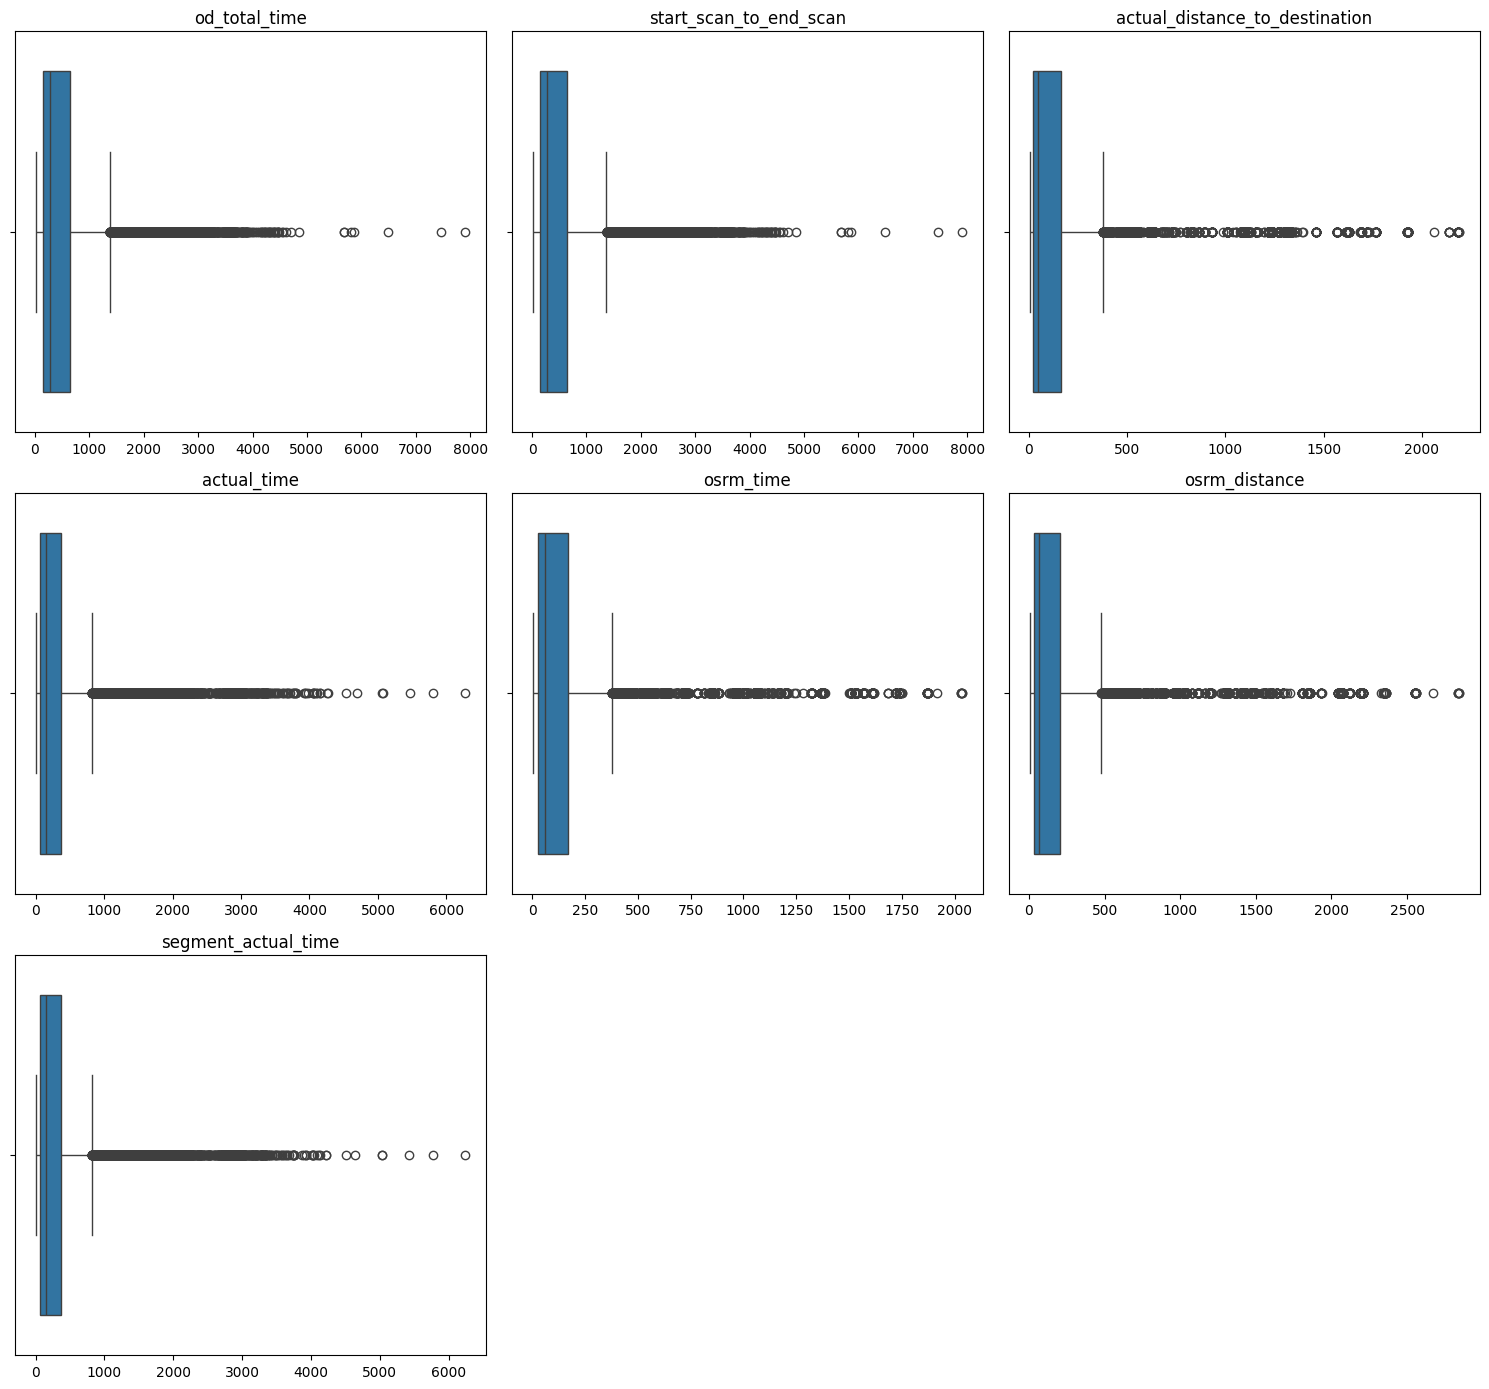

In [ ]:
#Set up the figure and axes for the plot
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(15, 14))

#flatten the axes array for ease of iteration
axes = axes.flatten()

#PLot the histogram for each column
for i, cols in enumerate(trip_records[num_cols]):
        sns.boxplot(x = df1[cols], ax=axes[i])
        axes[i].set_title(cols)
        axes[i].set_xlabel('')

# Remove empty plots in the last row
for j in range(7, 9):
    fig.delaxes(axes[j])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

**Almost all columns have outliers**

In [ ]:
#Detecting outliers
for i in num_cols:
    Q1 = np.quantile(df1[i], 0.25)
    Q3 = np.quantile(df1[i], 0.75)
    IQR = Q3 - Q1
    Lower_whisker = Q1 - (1.5 * IQR)
    Upper_whisker = Q3 + (1.5 * IQR)
    outliers = df1.loc[(df1[i] < Lower_whisker) | (df1[i] > Upper_whisker)]
    print('Column :', i)
    print(f'Q1 : {Q1}')
    print(f'Q3 : {Q3}')
    print(f'IQR : {IQR}')
    print(f'Number of outliers : {outliers.shape[0]}')
    print()

Column : od_total_time
Q1 : 149.9
Q3 : 638.2
IQR : 488.30000000000007
Number of outliers : 1266

Column : start_scan_to_end_scan
Q1 : 149.0
Q3 : 637.0
IQR : 488.0
Number of outliers : 1267

Column : actual_distance_to_destination
Q1 : 22.83723905859321
Q3 : 164.58320763841138
IQR : 141.74596857981817
Number of outliers : 1449

Column : actual_time
Q1 : 67.0
Q3 : 370.0
IQR : 303.0
Number of outliers : 1643

Column : osrm_time
Q1 : 29.0
Q3 : 168.0
IQR : 139.0
Number of outliers : 1517

Column : osrm_distance
Q1 : 30.8192
Q3 : 208.475
IQR : 177.6558
Number of outliers : 1524

Column : segment_actual_time
Q1 : 66.0
Q3 : 367.0
IQR : 301.0
Number of outliers : 1643

Column : segment_osrm_time
Q1 : 31.0
Q3 : 185.0
IQR : 154.0
Number of outliers : 1492

Column : segment_osrm_distance
Q1 : 32.6545
Q3 : 218.8024
IQR : 186.1479
Number of outliers : 1548



In [ ]:
outlier_df = trip_records.copy()
outlier_cols = outlier_df[['segment_osrm_time', 'osrm_time','segment_actual_time', 'actual_time',
                           'od_total_time', 'start_scan_to_end_scan',
                           'segment_osrm_distance', 'actual_distance_to_destination','osrm_distance']]

In [ ]:
#Treating outliers
records_without_outlier =  trip_records.loc[outlier_cols[(np.abs(stats.zscore(outlier_cols)) < 3).all(axis=1)].index]
records_without_outlier

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,actual_time,segment_actual_time,start_scan_to_end_scan,od_total_time,osrm_time,segment_osrm_time,segment_osrm_distance,osrm_distance,actual_distance_to_destination,route_schedule_uuid
0,trip-153671041653548748,FTL,Kanpur,Kanpur,"Kanpur,Uttar Pradesh","Kanpur,Uttar Pradesh",Uttar Pradesh,Uttar Pradesh,1562.0,1548.0,2259.0,2260.1,717.0,1008.0,1320.4733,991.3523,824.732854,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...
1,trip-153671042288605164,Carting,Doddablpur,Doddablpur,"Doddablpur,Karnataka","Doddablpur,Karnataka",Karnataka,Karnataka,143.0,141.0,180.0,181.6,68.0,65.0,84.1894,85.1110,73.186911,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...
3,trip-153671046011330457,Carting,Mumbai,Mumbai,"Mumbai,Maharashtra","Mumbai,Maharashtra",Maharashtra,Maharashtra,59.0,59.0,100.0,100.5,15.0,16.0,19.8766,19.6800,17.175274,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...
4,trip-153671052974046625,FTL,Bellary,Sandur,"Bellary,Karnataka","Sandur,Karnataka",Karnataka,Karnataka,341.0,340.0,717.0,718.3,117.0,115.0,146.7919,146.7918,127.448500,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...
5,trip-153671055416136166,Carting,Chennai,Chennai,"Chennai,Tamil Nadu","Chennai,Tamil Nadu",Tamil Nadu,Tamil Nadu,61.0,60.0,189.0,190.5,23.0,23.0,28.0647,28.0647,24.597048,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,Carting,Chandigarh,Chandigarh,"Chandigarh,Punjab","Chandigarh,Punjab",Punjab,Punjab,83.0,82.0,257.0,258.0,62.0,62.0,64.8551,73.4630,57.762332,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...
14813,trip-153861104386292051,Carting,Faridabad,Faridabad,"Faridabad,Haryana","Faridabad,Haryana",Haryana,Haryana,21.0,21.0,60.0,60.6,12.0,11.0,16.0883,16.0882,15.513784,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...
14814,trip-153861106442901555,Carting,Kanpur,Kanpur,"Kanpur,Uttar Pradesh","Kanpur,Uttar Pradesh",Uttar Pradesh,Uttar Pradesh,282.0,281.0,421.0,422.1,48.0,88.0,104.8866,58.9037,38.684839,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...
14815,trip-153861115439069069,Carting,Tirunelveli,Tirchchndr,"Tirunelveli,Tamil Nadu","Tirchchndr,Tamil Nadu",Tamil Nadu,Tamil Nadu,264.0,258.0,347.0,348.6,179.0,221.0,223.5324,171.1103,134.723836,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...


## Column Standardization

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

**Processing data for one-hot encoding**

In [ ]:
#Merging source & destination location into one to recategorize the data as per highest trip having location @top spot
records_without_outlier['destination_source_location'] = records_without_outlier['source_city_state'] + ' - ' + records_without_outlier['destination_city_state']
#records_without_outlier.drop(['source_city_state', 'destination_city_state'], axis = 1, inplace = True)

In [ ]:
source_destination_city = records_without_outlier.groupby('destination_source_location')['trip_uuid'].nunique().sort_values(
                                                            ascending = False).reset_index()
source_destination_city

,destination_source_location,trip_uuid
0,"Bangalore,Karnataka - Bangalore,Karnataka",1658
1,"Mumbai,Maharashtra - Mumbai,Maharashtra",659
2,"Chennai,Tamil Nadu - Chennai,Tamil Nadu",531
3,"Bhiwandi,Maharashtra - Mumbai,Maharashtra",437
4,"Hyderabad,Telangana - Hyderabad,Telangana",352
...,...,...
1675,"Kapurthala,Punjab - Nakodar,Punjab",1
1676,"Karad,Maharashtra - Karad,Maharashtra",1
1677,"Karanjia,Orissa - Bhadrak,Orissa",1
1678,"Karimganj,Assam - Silchar,Assam",1


In [ ]:
def city_cat(x):
    if 0 <= x <= 50:
        return 'Category 7'
    elif 51<= x <= 100:
        return 'Category 6'
    elif 101 <= x <= 200:
        return 'Category 5'
    elif 201 <= x <= 300:
        return 'Category 4'
    elif 301 <= x <= 400:
        return 'Category 3'
    elif 401 <= x <= 500:
        return 'Category 2'
    else:
        return 'Category 1'

In [ ]:
source_destination_city['city'] = pd.Series(map(city_cat, source_destination_city['trip_uuid']))
trip_records_for_encoding = source_destination_city.merge(records_without_outlier, on = 'destination_source_location')

trip_records_for_encoding.drop(["destination_source_location","trip_uuid_x"],axis = 1,inplace=True)
trip_records_for_encoding.drop(["trip_uuid_y"],axis = 1,inplace=True)

encoded_data = pd.get_dummies(trip_records_for_encoding,
             columns=["route_type","city"] )
encoded_data

,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,actual_time,segment_actual_time,start_scan_to_end_scan,od_total_time,osrm_time,segment_osrm_time,segment_osrm_distance,osrm_distance,actual_distance_to_destination,route_schedule_uuid,route_type_Carting,route_type_FTL,city_Category 1,city_Category 2,city_Category 3,city_Category 4,city_Category 5,city_Category 6,city_Category 7
0,Bangalore,Bangalore,"Bangalore,Karnataka","Bangalore,Karnataka",Karnataka,Karnataka,64.0,64.0,146.0,146.9,34.0,34.0,28.9203,28.9203,22.424210,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,True,False,True,False,False,False,False,False,False
1,Bangalore,Bangalore,"Bangalore,Karnataka","Bangalore,Karnataka",Karnataka,Karnataka,194.0,191.0,264.0,264.4,57.0,83.0,76.1272,53.1902,42.240305,thanos::sroute:09b4c49e-0e89-40b6-99b3-e671400...,True,False,True,False,False,False,False,False,False
2,Bangalore,Bangalore,"Bangalore,Karnataka","Bangalore,Karnataka",Karnataka,Karnataka,162.0,160.0,243.0,243.8,51.0,69.0,59.1472,41.1130,28.706240,thanos::sroute:500aa87c-3d54-4159-a296-0b93c15...,True,False,True,False,False,False,False,False,False
3,Bangalore,Bangalore,"Bangalore,Karnataka","Bangalore,Karnataka",Karnataka,Karnataka,200.0,199.0,244.0,244.6,58.0,71.0,65.6004,53.3320,42.150597,thanos::sroute:16a02d06-e6b6-443b-bd98-0a9e4f4...,True,False,True,False,False,False,False,False,False
4,Bangalore,Bangalore,"Bangalore,Karnataka","Bangalore,Karnataka",Karnataka,Karnataka,79.0,79.0,294.0,295.0,44.0,42.0,41.8593,42.0797,32.569779,thanos::sroute:5ffb9921-f943-446e-8796-0b06aa2...,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14155,Kapurthala,Nakodar,"Kapurthala,Punjab","Nakodar,Punjab",Punjab,Punjab,51.0,50.0,61.0,61.8,29.0,44.0,52.5412,41.5967,27.263920,thanos::sroute:16abf49b-3f11-48e2-962c-07fcc01...,False,True,False,False,False,False,False,False,True
14156,Karad,Karad,"Karad,Maharashtra","Karad,Maharashtra",Maharashtra,Maharashtra,197.0,196.0,203.0,204.4,193.0,190.0,121.2485,121.2485,100.395892,thanos::sroute:207339fb-6d6d-4310-9a01-2f12de3...,False,True,False,False,False,False,False,False,True
14157,Karanjia,Bhadrak,"Karanjia,Orissa","Bhadrak,Orissa",Orissa,Orissa,284.0,283.0,461.0,461.6,118.0,181.0,213.5257,166.1308,94.518704,thanos::sroute:38e6d56f-8d2e-44c8-9366-85501ed...,False,True,False,False,False,False,False,False,True
14158,Karimganj,Silchar,"Karimganj,Assam","Silchar,Assam",Assam,Assam,105.0,105.0,208.0,209.2,29.0,29.0,43.1656,43.1656,33.764700,thanos::sroute:108a8880-49de-4128-ade2-6a0040d...,False,True,False,False,False,False,False,False,True


In [ ]:
scaler = StandardScaler()
std_data = scaler.fit_transform(encoded_data[['segment_osrm_time', 'osrm_time',
                                              'segment_actual_time', 'actual_time',
                                              'od_total_time', 'start_scan_to_end_scan',
                                              'segment_osrm_distance','osrm_distance',
                                              'actual_distance_to_destination']])
std_data = pd.DataFrame(std_data, columns = ['segment_osrm_time', 'osrm_time',
                                              'segment_actual_time', 'actual_time',
                                              'od_total_time', 'start_scan_to_end_scan',
                                              'segment_osrm_distance','osrm_distance',
                                              'actual_distance_to_destination'])

std_data

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,od_total_time,start_scan_to_end_scan,segment_osrm_distance,osrm_distance,actual_distance_to_destination
0,-0.586416,-0.576329,-0.647560,-0.650385,-0.687204,-0.687732,-0.602165,-0.600361,-0.584797
1,-0.269133,-0.408016,-0.220225,-0.216154,-0.394254,-0.393319,-0.362747,-0.465847,-0.451036
2,-0.359785,-0.451924,-0.324535,-0.323042,-0.445614,-0.445715,-0.448864,-0.532784,-0.542393
3,-0.346835,-0.400699,-0.193306,-0.196113,-0.443619,-0.443220,-0.416136,-0.465061,-0.451642
4,-0.534615,-0.503150,-0.597087,-0.600281,-0.317962,-0.318468,-0.536543,-0.527426,-0.516313
...,...,...,...,...,...,...,...,...,...
14155,-0.521664,-0.612919,-0.694667,-0.693808,-0.899375,-0.899810,-0.482368,-0.530103,-0.552128
14156,0.423711,0.587223,-0.203401,-0.206133,-0.543845,-0.545516,-0.133907,-0.088638,-0.058479
14157,0.365434,0.038378,0.089340,0.084467,0.097403,0.098202,0.334092,0.160119,-0.098151
14158,-0.618792,-0.612919,-0.509601,-0.513435,-0.531878,-0.533041,-0.529918,-0.521407,-0.508247


## Route Analysis

**1. Top source & destination with highest no. of trips**

In [ ]:
no_of_trips_between_cities = df1.groupby(["source_city"])["trip_uuid"].count().sort_values(ascending=False).reset_index()
no_of_trips_between_cities.head(25)

,source_city,trip_uuid
0,Bangalore,1815
1,Gurgaon,1165
2,Mumbai,954
3,Delhi,723
4,Bhiwandi,697
5,Chennai,570
6,Hyderabad,515
7,Pune,480
8,Kolkata,356
9,Sonipat,276


<ipython-input-131-4ba4d26b6420>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = no_of_trips_between_cities,


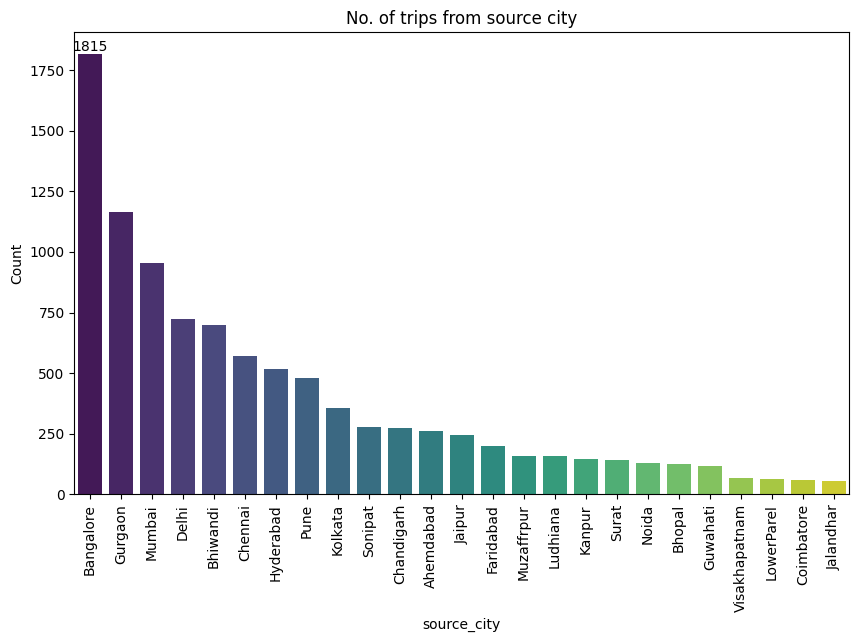

In [ ]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(data = no_of_trips_between_cities,
            y = no_of_trips_between_cities['trip_uuid'].head(25),
            x = no_of_trips_between_cities['source_city'].head(25),
            palette = 'viridis')
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)
plt.title('No. of trips from source city')
plt.ylabel('Count')
plt.show()

<ipython-input-132-3fd6e30cb92e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_source_states,


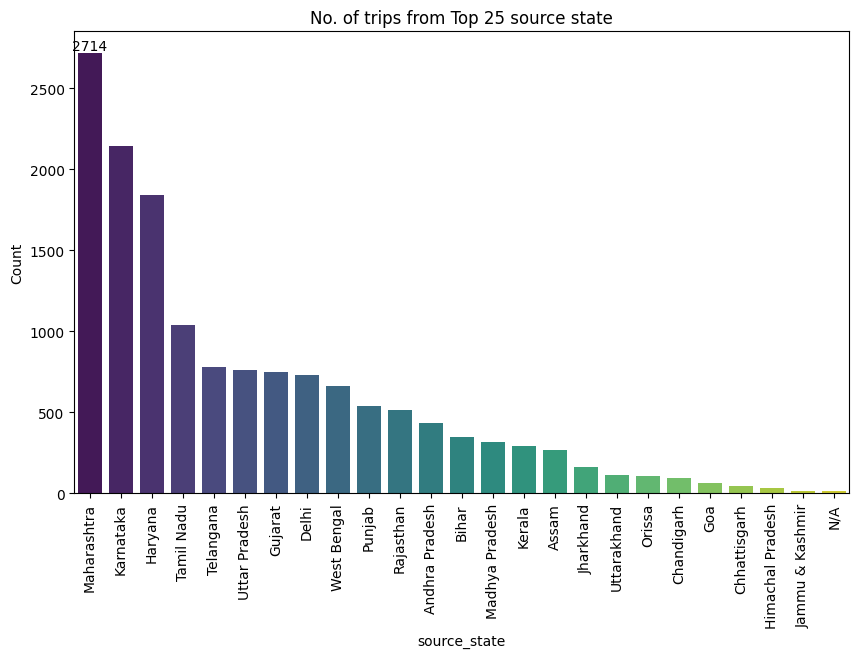

In [ ]:
top_source_states = df1.groupby(["source_state"])["trip_uuid"].count().sort_values(ascending=False).reset_index()

plt.figure(figsize = (10, 6))
ax = sns.barplot(data = top_source_states,
            y = top_source_states['trip_uuid'].head(25),
            x = top_source_states['source_state'].head(25),
            palette = 'viridis')
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)
plt.title('No. of trips from Top 25 source state')
plt.ylabel('Count')
plt.show()

<ipython-input-133-1cabe261ea10>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_destination_city,


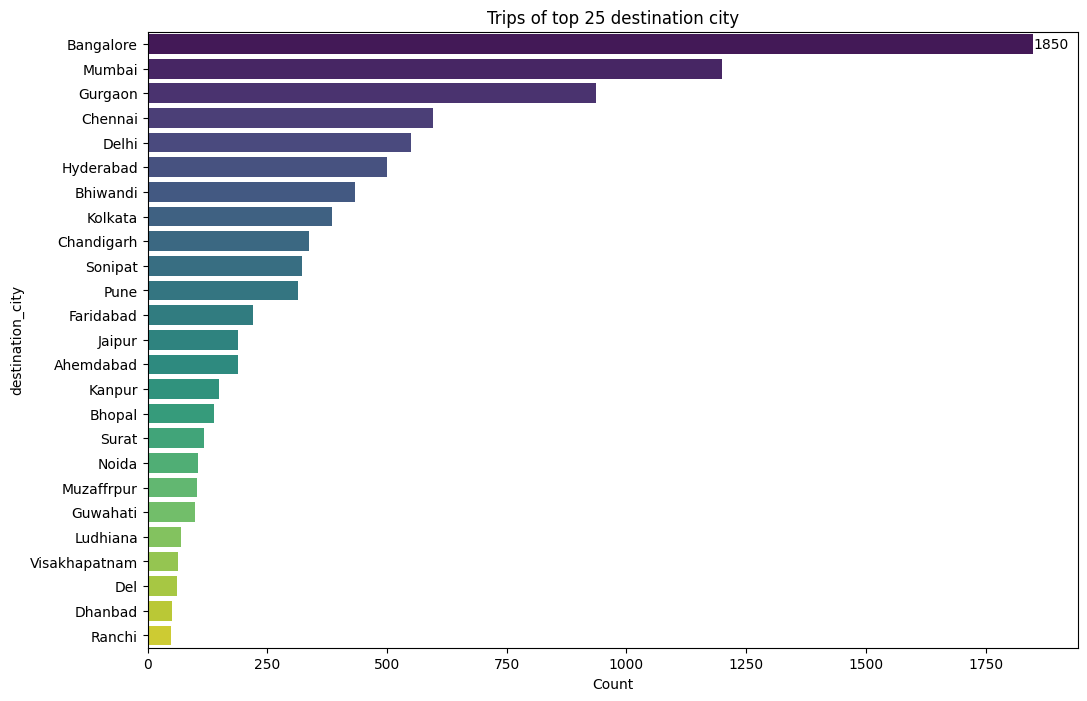

In [ ]:
top_destination_city = df1.groupby('destination_city')['trip_uuid'].count().sort_values(ascending = False).reset_index()

plt.figure(figsize=(12,8))
ax = sns.barplot(data = top_destination_city,
            x = top_destination_city['trip_uuid'].head(25),
            y = top_destination_city['destination_city'].head(25),
            palette = 'viridis')
ax.bar_label(ax.containers[0])
plt.yticks(rotation = 0)
plt.title('Trips of top 25 destination city')
plt.xlabel('Count')
plt.show()

<ipython-input-134-15bf895567df>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_destination_state,


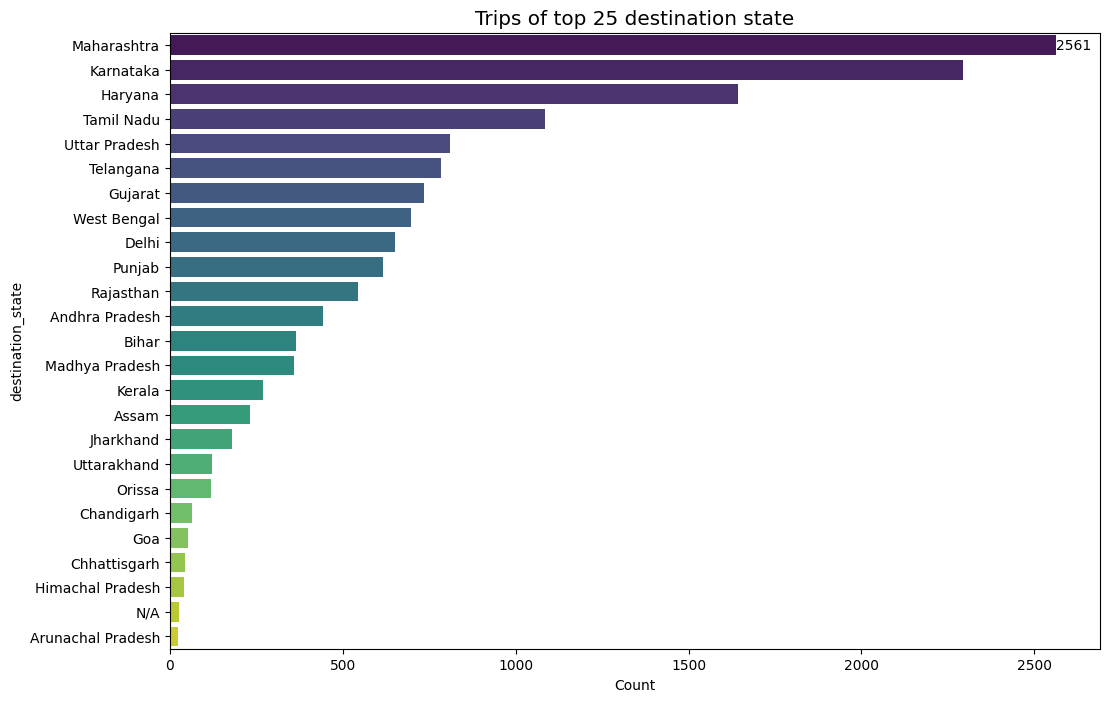

In [ ]:
top_destination_state = df1.groupby('destination_state')['trip_uuid'].count().sort_values(ascending = False).reset_index()

plt.figure(figsize=(12,8))
ax = sns.barplot(data = top_destination_state,
            x = top_destination_state['trip_uuid'].head(25),
            y = top_destination_state['destination_state'].head(25),
            palette = 'viridis')
ax.bar_label(ax.containers[0])
plt.yticks(rotation = 0)
plt.title('Trips of top 25 destination state', fontsize = 'x-large')
plt.xlabel('Count')
plt.show()

In [ ]:
route_type = df1.groupby(by = 'route_type')['trip_uuid'].count().to_frame().reset_index()
route_type

,route_type,trip_uuid
0,Carting,8908
1,FTL,5909


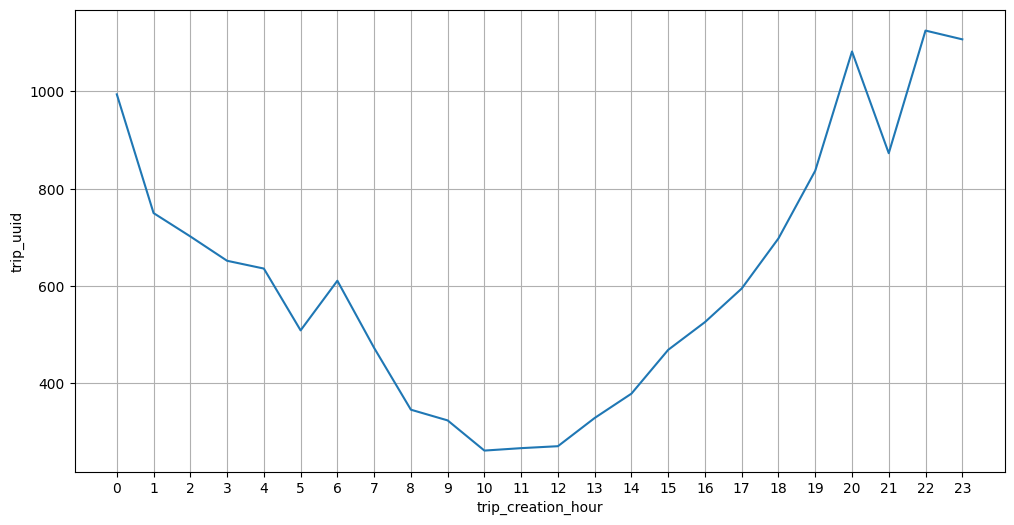

In [ ]:
trips_by_hours = df1.groupby('trip_creation_hour')['trip_uuid'].count().to_frame().reset_index()

plt.figure(figsize = (12, 6))
sns.lineplot(data = trips_by_hours,
             x = trips_by_hours['trip_creation_hour'],
             y = trips_by_hours['trip_uuid'])
plt.xticks(np.arange(0,24))
plt.grid('both')
plt.show()

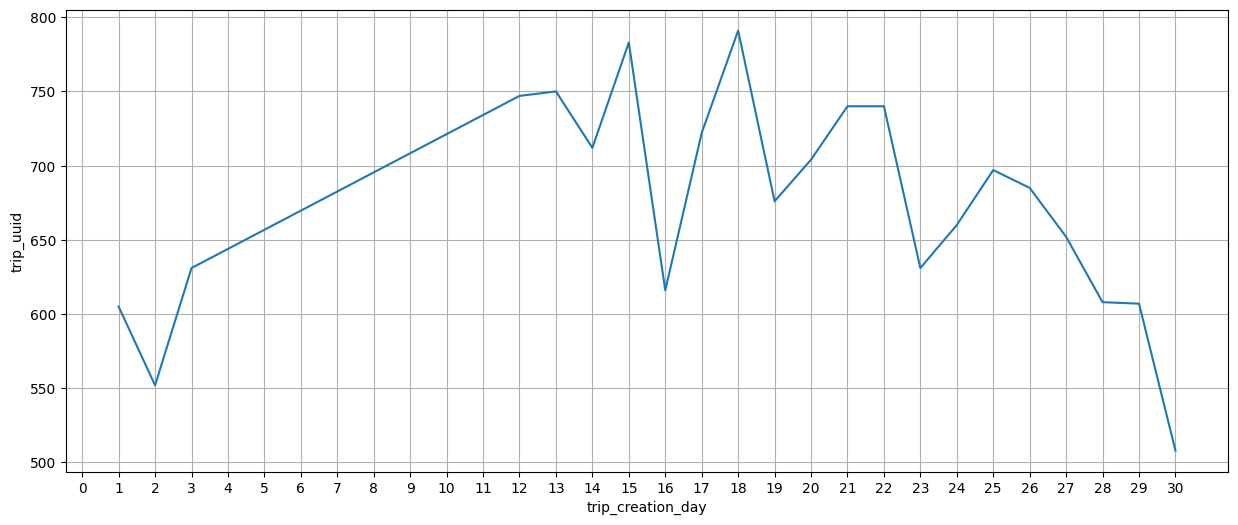

In [ ]:
trips_per_day = df1.groupby(by = 'trip_creation_day')['trip_uuid'].count().to_frame().reset_index()

plt.figure(figsize = (15, 6))
sns.lineplot(data = trips_per_day,
             x = trips_per_day['trip_creation_day'],
             y = trips_per_day['trip_uuid'])
plt.xticks(np.arange(0, 31))
plt.grid('both')
plt.show()

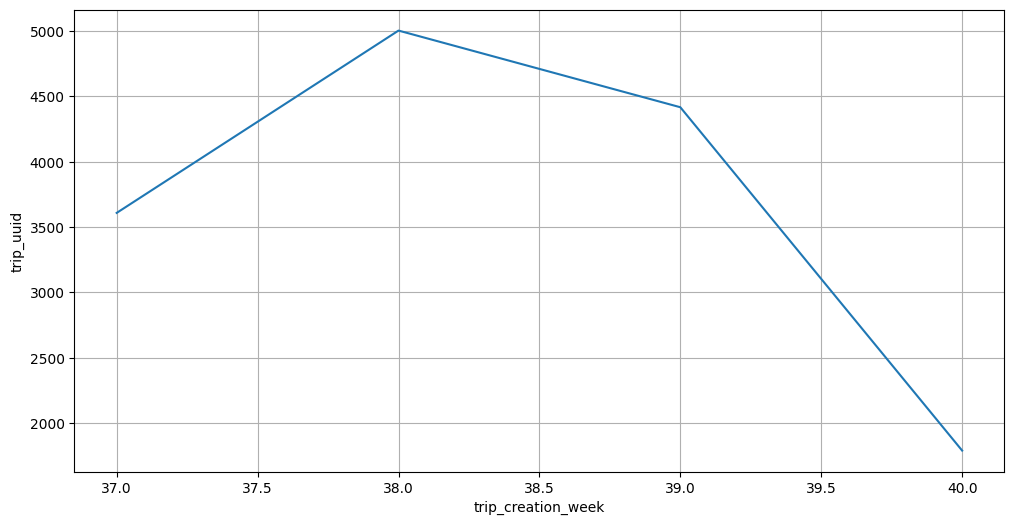

In [ ]:
trips_per_week = df1.groupby(by = 'trip_creation_week')['trip_uuid'].count().to_frame().reset_index()

plt.figure(figsize = (12, 6))
sns.lineplot(data = trips_per_week,
             x = trips_per_week['trip_creation_week'],
             y = trips_per_week['trip_uuid'])
plt.grid('both')
plt.show()

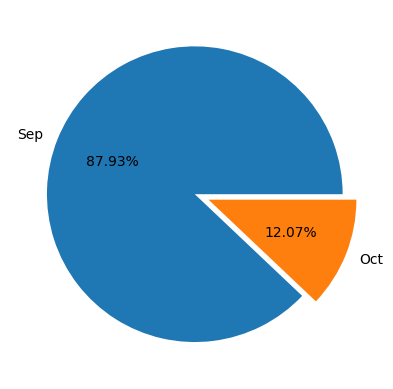

In [ ]:
trips_month = df1.groupby(by = 'trip_creation_month')['trip_uuid'].count().to_frame().reset_index()
trips_month['perc'] = np.round(trips_month['trip_uuid'] * 100/ trips_month['trip_uuid'].sum(), 2)

plt.pie(x = trips_month['trip_uuid'],
        labels = ['Sep', 'Oct'],
        explode = [0, 0.1],
       autopct = '%.2f%%')
plt.show()

In [ ]:
trips_between_cities = df1.groupby(["source_city_state",
                                               "destination_city_state"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()
trips_between_cities.head(25)

,source_city_state,destination_city_state,trip_uuid
0,"Bangalore,Karnataka","Bangalore,Karnataka",1658
1,"Mumbai,Maharashtra","Mumbai,Maharashtra",659
2,"Chennai,Tamil Nadu","Chennai,Tamil Nadu",531
3,"Bhiwandi,Maharashtra","Mumbai,Maharashtra",437
4,"Hyderabad,Telangana","Hyderabad,Telangana",355
5,"Kolkata,West Bengal","Kolkata,West Bengal",274
6,"Mumbai,Maharashtra","Bhiwandi,Maharashtra",270
7,"Delhi,Delhi","Gurgaon,Haryana",261
8,"Gurgaon,Haryana","Gurgaon,Haryana",260
9,"Gurgaon,Haryana","Delhi,Delhi",242


- **From above table, we can observe that Mumbai Maharashtra ,Delhi ,Gurgaon(Haryana),Bengaluru Karnataka ,Hyderabad Telangana,Chennai Tamil Nadu,Ahmedabad,,Pune Maharashtra,Chandigarh and Kolkata are some cities have higest amount of trips happening states with in the city**

- **The highest number of trips has occured between corridor of bengalore - bangalore, mumbai - mumbai, chennai-chennai, gurgaon-gurgaon**

## Insights:

- The data is given from the period '2018-09-12 00:00:16' to '2018-10-08 03:00:24'.

- There are about 14817 unique trip IDs, 1508 unique source centers, 1481 unique destination_centers, 690 unique source cities, 806 unique destination cities.

- The number of trips start increasing after the noon gradually peaking at 10 P.M and takes dip afterwards.

- Maximum trips are created in the 38th week.

- Most trips occurs mid-month. That means customers usually make more orders in the mid of the month.

- Most orders are sourced from the states like Maharashtra, Karnataka, Haryana, Tamil Nadu, Telangana

- Maximum number of trips originated from Mumbai city followed by Gurgaon Delhi, Bengaluru and Bhiwandi. That means that the seller base is strong in these cities.

- Maximum number of trips ended in Maharashtra state followed by Karnataka, Haryana, Tamil Nadu and Uttar Pradesh. That means that the number of orders placed in these states is significantly high.

- Maximum number of trips ended in Mumbai city followed by Bengaluru, Gurgaon, Delhi and Chennai. That means that the number of orders placed in these cities is significantly high.

- Most orders in terms of destination are coming from cities like bengaluru, mumbai, gurgaon, bangalore, Delhi.

- The mean time of `start_scan_to_end_scan and od_total_time` are statistically similar.

- Features `actual_time & osrm_time` are statitically different.

- Features `start_scan_to_end_scan and segment_actual_time` are statistically similar.

- Features `osrm_distance and segment_osrm_distance` are statistically different from each other.

- Both the `osrm_time & segment_osrm_time` are not statistically same.

## Recommendations

- The OSRM trip planning system needs to be revamped. Discrepancies need to be catered to for transporters, if the routing engine is configured for optimum results.


- `osrm_time and actual_time` are different. Team needs to make sure this difference is reduced, so that better delivery time prediction can be made and it becomes convenient for the customer to expect an accurate delivery time.

- The `osrm distance and actual distance` covered are also not same i.e. maybe the delivery person is not following the predefined route which may lead to late deliveries or the osrm devices is not properly predicting the route based on distance, traffic and other factors.

- Most of the orders are coming from/reaching to states like Maharashtra, Karnataka, Haryana and Tamil Nadu. The existing corridors can be further enhanced to improve the penetration in these areas.

- Customer profiling of the customers belonging to the states Maharashtra, Karnataka, Haryana, Tamil Nadu and Uttar Pradesh has to be done to get to know why major orders are coming from these atates and to improve customers' buying and delivery experience.

- From state point of view, we might have very heavy traffic in certain states and bad terrain conditions in certain states. This will be a good indicator to plan and cater to demand during peak festival seasons.